In [203]:
## Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from feature_engine import variable_transformers as vt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score , roc_auc_score
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [330]:
# Loading the dataset
df_credit = pd.read_csv(r'C:\Users\tabish\Downloads\310_23498_bundle_archive\creditcard.csv')

In [331]:
# checking the dataframe
df_credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Exploratory Data Analysis

In [332]:
# Checking for datatypes
df_credit.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [333]:
# Checking null values if any
df_credit.isnull().any().any()

False

In [334]:
df_credit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


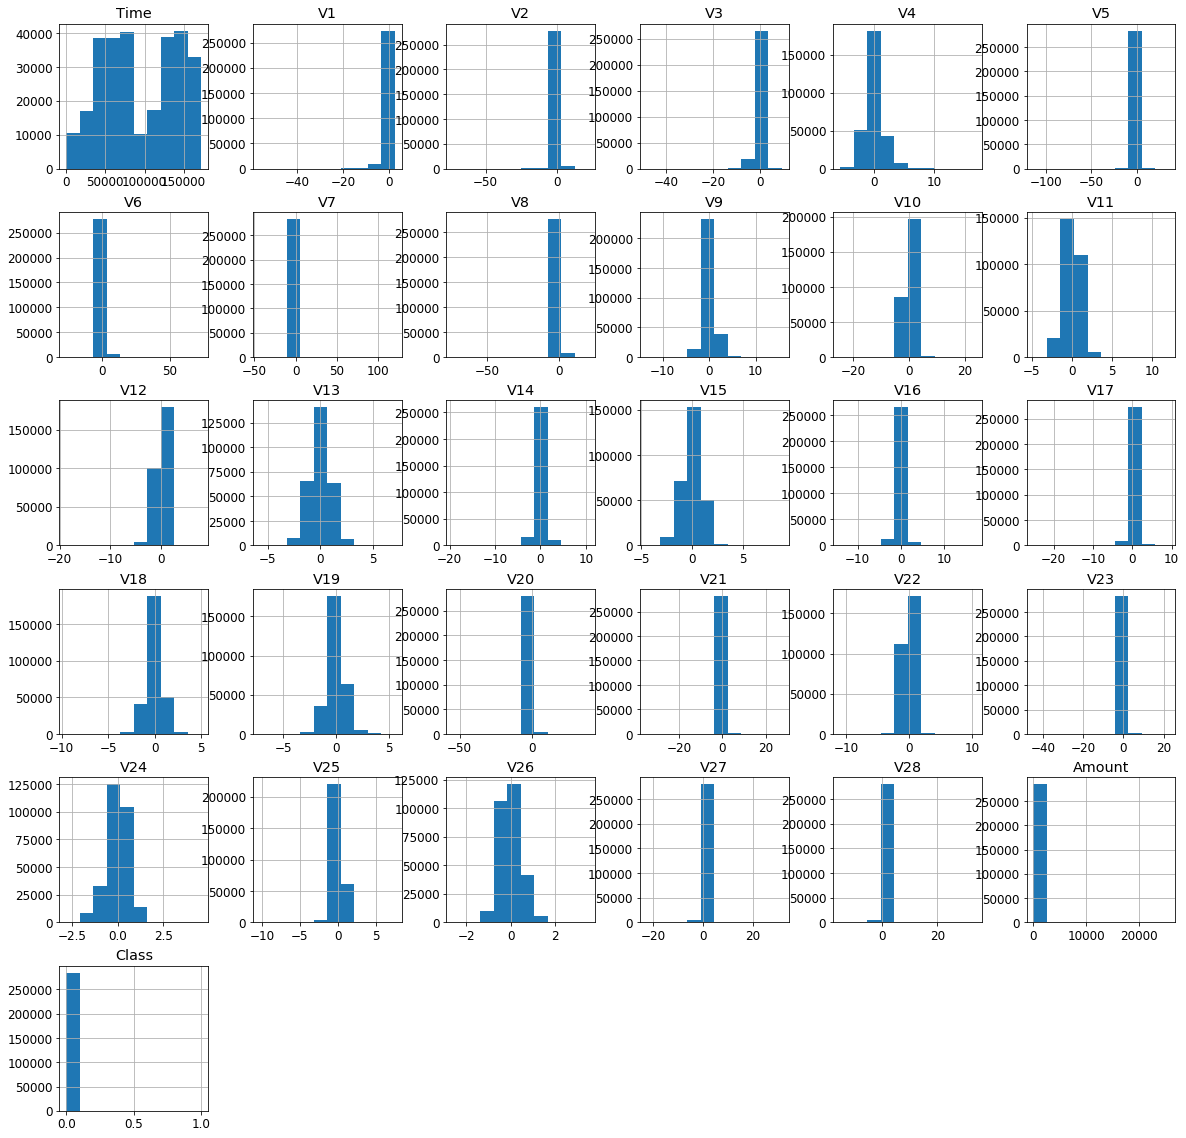

In [335]:
# Checking for skewness through Histogram Plot
df_credit.hist(figsize=(20,20))
plt.show()

##### As we can see almost all the variables are skewed. We will handle skewness later

### Checking for Classes

In [336]:
classes = df_credit['Class'].value_counts()
normal_share = classes[0]/df_credit['Class'].count()*100
fraud_share = classes[1]/df_credit['Class'].count()*100

print(classes)
print(normal_share)
print(fraud_share)

0    284315
1       492
Name: Class, dtype: int64
99.82725143693798
0.1727485630620034


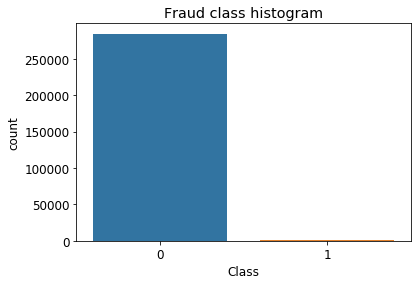

In [337]:
sns.countplot(df_credit['Class'])
plt.title('Fraud class histogram')
plt.show()

##### From the above plot it can be seen there data imbalance with majority in class 0 and only few in class 1. This need to be handled

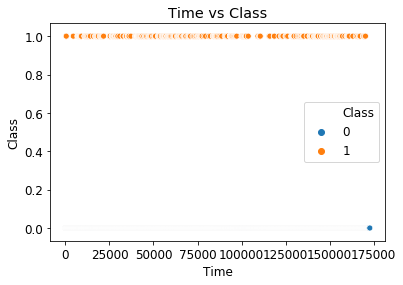

In [338]:
# Scatter plot between Categorical column Class and Time

sns.scatterplot(x = 'Time', y = 'Class', hue = 'Class', data = df_credit)
plt.title('Time vs Class')
plt.show()

#### As we see above, the pattern of time variable remains random for both non-fradulent and fraudulent transactions at any hour of the day.

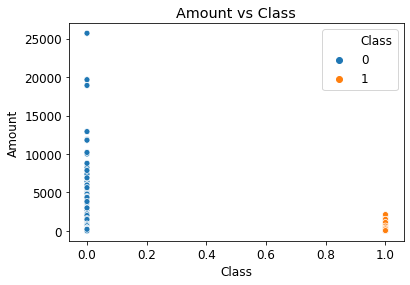

In [339]:
# Scatter plot between Categorical column Class and Amount
sns.scatterplot(x = 'Class', y = 'Amount', hue = 'Class', data = df_credit)
plt.title('Amount vs Class')
plt.show()

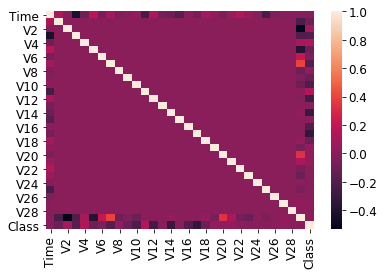

In [340]:
sns.heatmap(df_credit.corr())
plt.show()

In [341]:
# Dropping Time column as it is not clear what it represents

df_credit = df_credit.drop('Time', axis = 1)
df_credit.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Splitting the data into Test and Train Set

In [342]:
# Putting the features variable to X
X = df_credit.drop(['Class'], axis = 1)

# Putting a target variable to y
y = df_credit['Class']

In [343]:
# Checking X daataframe
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [344]:
# checking y
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [345]:
# Splitting into test and train dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)


In [346]:
# Checking for X_train 
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
7610,1.160485,0.010653,0.731921,-0.083757,-0.204162,0.309873,-0.503116,0.130077,1.279474,-0.528215,...,-0.109200,-0.167768,-0.142183,0.148065,-0.261307,-0.052688,0.904879,-0.061990,-0.012372,0.26
190214,2.054237,-0.078678,-1.233161,0.183785,0.187539,-0.605905,0.102048,-0.183363,0.245017,0.229607,...,-0.169517,-0.263893,-0.636424,0.263862,-0.480128,-0.249245,0.206509,-0.072079,-0.074044,1.29
130590,1.434517,-1.560173,-0.783968,-2.432927,0.578638,3.528638,-1.814737,0.859190,-1.680052,1.451927,...,-0.068984,-0.020924,0.089320,-0.120671,1.009913,0.510411,-0.038200,0.047306,0.031218,71.99
247916,-0.112311,1.235492,-0.312905,-0.502613,0.699869,-1.028247,0.964615,-0.112966,0.082123,-0.539202,...,0.135098,-0.334646,-0.734681,0.161824,0.984857,-0.439226,0.093359,0.332998,0.149541,0.89
55518,1.123477,-0.093882,0.988880,0.533433,-0.769281,-0.068741,-0.575773,0.257399,0.235960,0.066642,...,-0.170440,-0.003975,-0.052800,0.145628,0.219496,0.000863,0.215796,0.000743,0.013160,5.99


In [347]:
# Checking for X_test
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
49089,1.229452,-0.235478,-0.627166,0.419877,1.797014,4.069574,-0.896223,1.036103,0.745991,-0.147304,...,-0.057922,-0.170060,-0.288750,-0.130270,1.025935,0.847990,-0.271476,0.060052,0.018104,1.99
154704,2.016893,-0.088751,-2.989257,-0.142575,2.675427,3.332289,-0.652336,0.752811,1.962566,-1.025024,...,-0.147619,-0.184153,-0.089661,0.087188,0.570679,0.101899,0.620842,-0.048958,-0.042831,6.99
67247,0.535093,-1.469185,0.868279,0.385462,-1.439135,0.368118,-0.499370,0.303698,1.042073,-0.437209,...,0.437685,0.028010,-0.384708,-0.128376,0.286638,-0.136700,0.913904,-0.083364,0.052485,306.16
251657,2.128486,-0.117215,-1.513910,0.166456,0.359070,-0.540072,0.116023,-0.216140,0.680314,0.079977,...,-0.227278,-0.357993,-0.905085,0.223474,-1.075605,-0.188519,0.267672,-0.071733,-0.072238,0.99
201903,0.558593,1.587908,-2.368767,5.124413,2.171788,-0.500419,1.059829,-0.254233,-1.959060,0.948915,...,0.249457,-0.035049,0.271455,0.381606,0.332001,-0.334757,0.448890,0.168585,0.004955,30.27


In [348]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
350
142


### Scaling of Amount Column

In [349]:
scaler = StandardScaler()
X_train['Amount_Scaled'] = scaler.fit_transform(X_train['Amount'].values.reshape(-1, 1))

X_train = X_train.drop('Amount', axis = 1)

X_train.head

C:\Users\Tabish\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<bound method NDFrame.head of               V1        V2        V3        V4        V5        V6        V7  \
7610    1.160485  0.010653  0.731921 -0.083757 -0.204162  0.309873 -0.503116   
190214  2.054237 -0.078678 -1.233161  0.183785  0.187539 -0.605905  0.102048   
130590  1.434517 -1.560173 -0.783968 -2.432927  0.578638  3.528638 -1.814737   
247916 -0.112311  1.235492 -0.312905 -0.502613  0.699869 -1.028247  0.964615   
55518   1.123477 -0.093882  0.988880  0.533433 -0.769281 -0.068741 -0.575773   
...          ...       ...       ...       ...       ...       ...       ...   
212912 -0.711190  0.439833  0.963645 -1.558006 -0.849632  0.856514 -2.359232   
65615  -2.720797 -2.019693  0.555552 -1.214493  1.091755 -1.048706 -0.732389   
253799 -1.825901 -0.539605 -0.263009  0.516277 -0.432071  0.097944  3.833402   
210755 -0.360815  0.942995  0.256998  0.385238  0.606772 -0.806142  0.943830   
56088   0.631569 -0.899715  1.229477  1.833747 -1.245935  0.445119 -0.455523   

         

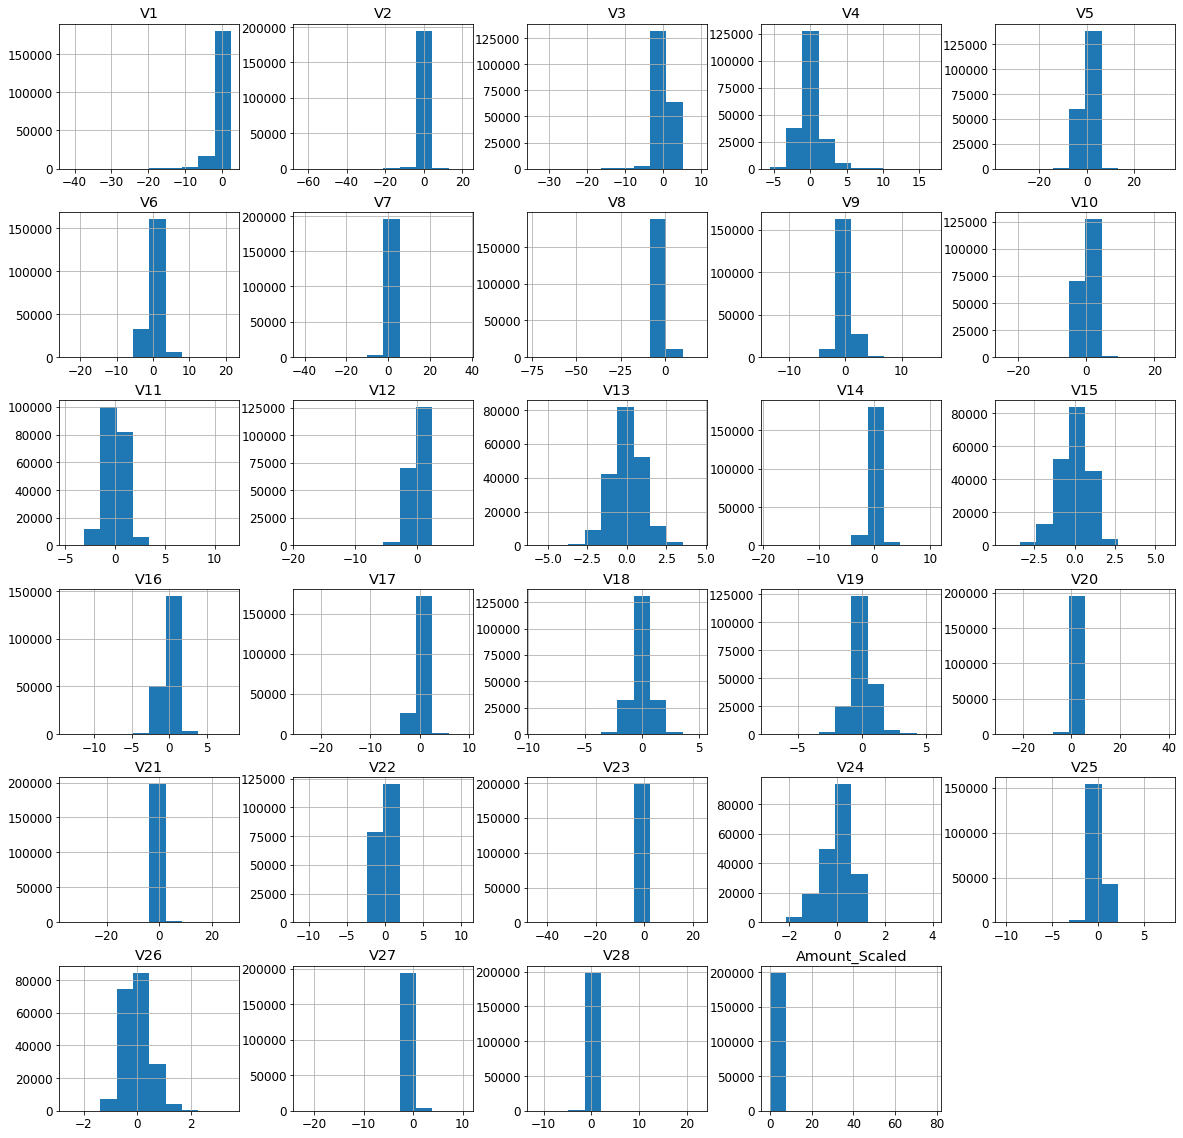

In [350]:
# plotting Histogram for varaibles to check skewness
X_train.hist(figsize=(20,20))
plt.show()

### Handling Skewness Using Yeo Johnson Transformer Method

In [351]:
# Yeo Johnson transformaation to handle skewness
tf = vt.YeoJohnsonTransformer()
tf.fit(X_train)

X_train_sk = tf.transform(X_train)

In [352]:
X_train_sk.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_Scaled
7610,1.439505,0.010665,0.811464,-0.084377,-0.204073,0.297919,-0.499487,0.132425,1.192722,-0.545328,...,-0.109195,-0.169164,-0.141440,0.148848,-0.248375,-0.052429,0.765477,-0.061660,-0.012380,-0.660416
190214,2.858298,-0.078024,-1.059845,0.180935,0.187614,-0.651411,0.102216,-0.178898,0.240851,0.226208,...,-0.169507,-0.267260,-0.623510,0.266271,-0.439912,-0.243835,0.197196,-0.071635,-0.074325,-0.648214
130590,1.849150,-1.388327,-0.705036,-2.786338,0.579284,2.730226,-1.778616,0.948661,-1.833812,1.351981,...,-0.068982,-0.020947,0.089620,-0.120150,1.195566,0.532464,-0.038548,0.047500,0.031168,-0.076480
247916,-0.109420,1.366296,-0.298251,-0.522857,0.700788,-1.150587,0.976769,-0.111224,0.081628,-0.556992,...,0.135105,-0.339965,-0.717888,0.162755,1.161960,-0.423422,0.091357,0.341960,0.148432,-0.652936
55518,1.386019,-0.092955,1.128667,0.511951,-0.768191,-0.069394,-0.571109,0.266349,0.232084,0.066339,...,-0.170429,-0.003976,-0.052694,0.146386,0.229321,0.000863,0.205667,0.000743,0.013151,-0.594205


##### Checking skewness by histogram Plot again after transforming data.

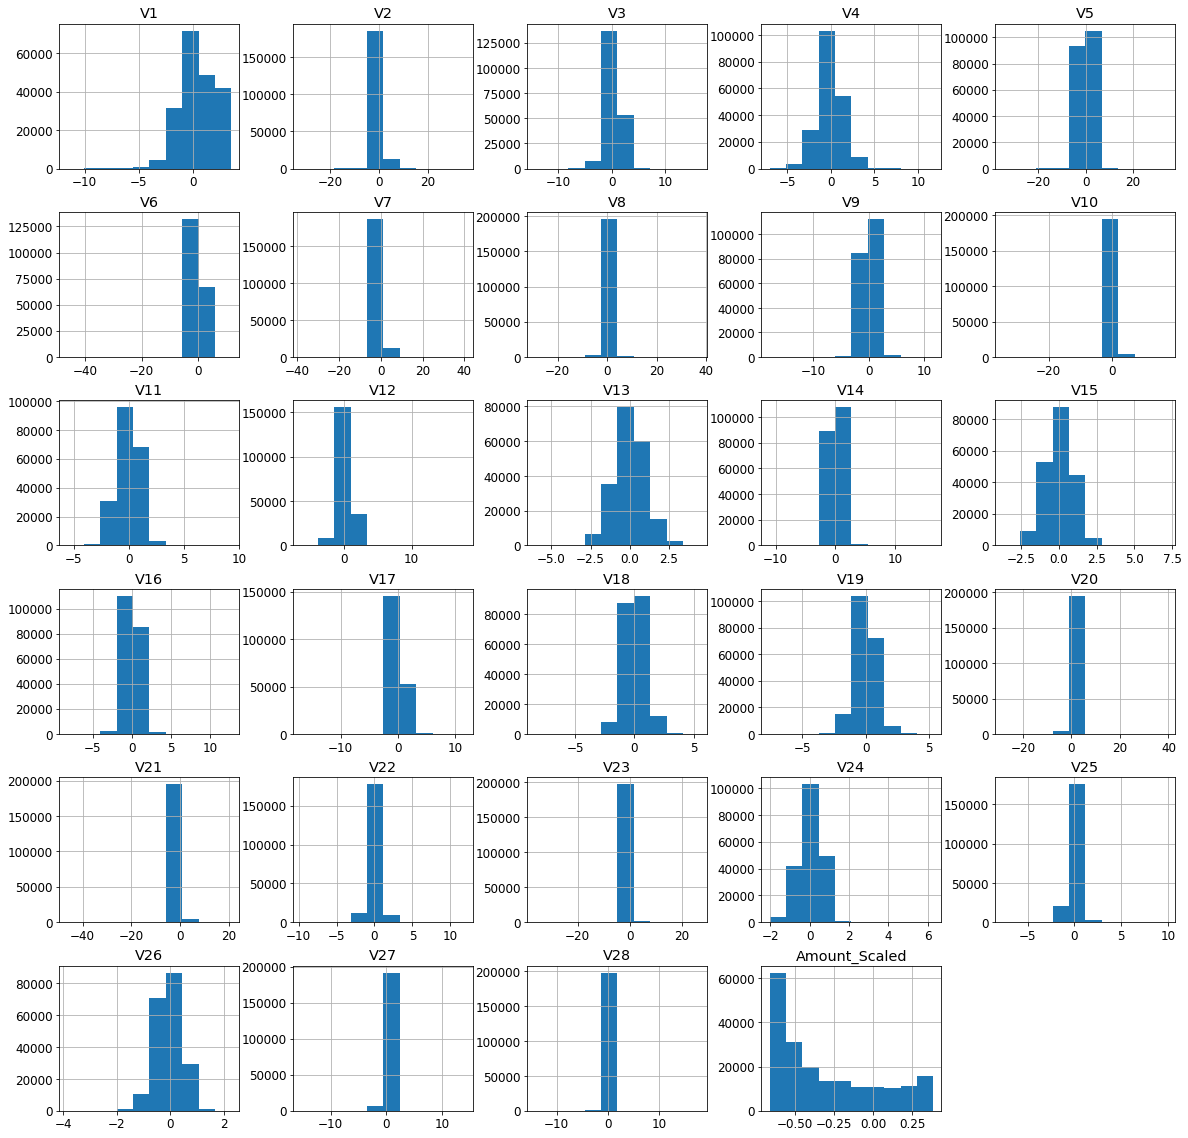

In [353]:
X_train_sk.hist(figsize = [20, 20])
plt.show()

In [368]:
# Transforming the X_test data
tf1 = vt.YeoJohnsonTransformer()

tf1.fit(X_test)

X_test_sk = tf1.transform(X_test)

# LOGISTIC REGRESSION

### LR with Imbalanced DataSet

#### Without Hyperparameter Tuning

In [29]:
# Initialising Logistic Regression
logR = LogisticRegression()

# Fitting thetrain data
logR.fit(X_train_sk, y_train)

LogisticRegression()

In [30]:
# Predictions on test dataset
y_pred = logR.predict(X_train_sk)

In [31]:
# Printing Classification report
print(metrics.classification_report(y_train, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199014
           1       0.90      0.70      0.79       350

    accuracy                           1.00    199364
   macro avg       0.95      0.85      0.90    199364
weighted avg       1.00      1.00      1.00    199364



In [32]:
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_train , y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_train , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_train , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_train , y_pred)))
# print('Confusion Matrix : \n', cnf_matrix)
print("\n")

AUC : 0.85136
Precision : 0.90441
Recall : 0.70286
F1 : 0.79100




In [33]:
cnf_matrix = metrics.confusion_matrix(y_train,y_pred)
cnf_matrix

array([[198988,     26],
       [   104,    246]], dtype=int64)

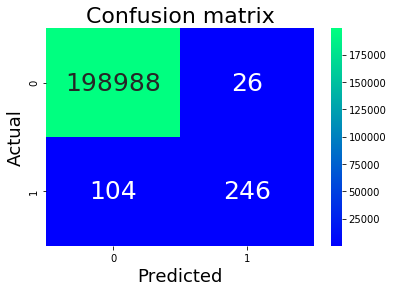

In [34]:
# Heatmap for Confusion Matrix
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.ylabel('Actual',fontsize = 18)
plt.xlabel('Predicted',fontsize = 18)

# ax.xaxis.set_ticklabels(['Genuine', 'Fraud']); 
# ax.yaxis.set_ticklabels(['Genuine', 'Fraud']);

plt.show()

In [35]:
metrics.roc_auc_score(y_train , y_pred) 

0.8513632493909259

AUC -  0.8513632493909259 



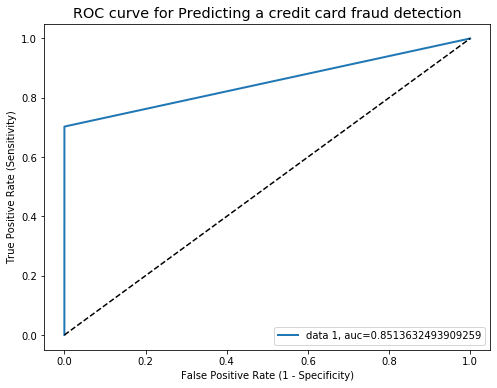

In [36]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred)

auc = metrics.roc_auc_score(y_train, y_pred)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

## HyperParameter Tuning

In [37]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [20, 29], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [38]:
model.fit(X_train_sk, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   32.4s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  2.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [20, 29]},
             scoring='roc_auc', verbose=1)

In [39]:
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,7.302867,0.330628,0.000000,0.000000,0.1,l1,20,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,32
1,2.686741,0.401739,0.000000,0.000000,0.1,l1,29,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
2,8.727670,1.246154,0.139013,0.023445,0.1,l2,20,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.949473,0.935826,0.923162,0.920049,0.946541,0.935010,0.011891,9
3,6.418647,1.036653,0.177180,0.036727,0.1,l2,29,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.983183,0.982936,0.979149,0.976654,0.990865,0.982557,0.004817,1
4,6.856726,1.060697,0.000000,0.000000,0.5,l1,20,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,23
5,2.857070,0.383214,0.000000,0.000000,0.5,l1,29,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,29
6,8.780582,1.514976,0.149507,0.037438,0.5,l2,20,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.949155,0.935898,0.921355,0.920666,0.944109,0.934236,0.011601,10
7,7.013102,1.329473,0.199861,0.045253,0.5,l2,29,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.981137,0.982257,0.976980,0.976630,0.989080,0.981217,0.004515,2
8,7.070641,1.248858,0.000000,0.000000,1,l1,20,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
9,2.544720,0.409709,0.000000,0.000000,1,l1,29,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,30


In [40]:
# Best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9825572631323389
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 29}


In [41]:
# predict churn on test data
y_pred = model.predict(X_train_sk)

In [42]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
# create onfusion matrix
cm = confusion_matrix(y_train, y_pred)
print(cm)

[[198956     58]
 [    58    292]]


In [44]:
# check area under curve
y_pred_prob = model.predict_proba(X_train_sk)[:, 1]

print("Accuracy    =>", roc_auc_score(y_train, y_pred_prob))
print("Sensitivity =>", cm[0,0]/(cm[0,0]+cm[0,1]))
print("Specificity =>", cm[1,1]/(cm[1,0]+cm[1,1]))

Accuracy    => 0.9873800263872319
Sensitivity => 0.9997085632166581
Specificity => 0.8342857142857143


AUC -  0.9169971387511863 



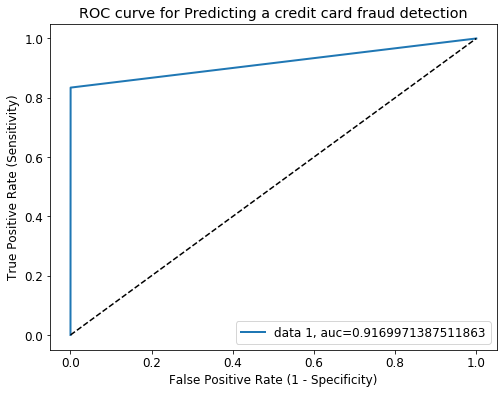

In [45]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred)

auc = metrics.roc_auc_score(y_train, y_pred)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

# Logistic Regression with Balanced Dataset

### LR With SMOTE

#### With Default Parameters

In [46]:
X_train_sk.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_Scaled
7610,1.439505,0.010665,0.811464,-0.084377,-0.204073,0.297919,-0.499487,0.132425,1.192722,-0.545328,...,-0.109195,-0.169164,-0.141440,0.148848,-0.248375,-0.052429,0.765477,-0.061660,-0.012380,-0.660416
190214,2.858298,-0.078024,-1.059845,0.180935,0.187614,-0.651411,0.102216,-0.178898,0.240851,0.226208,...,-0.169507,-0.267260,-0.623510,0.266271,-0.439912,-0.243835,0.197196,-0.071635,-0.074325,-0.648214
130590,1.849150,-1.388327,-0.705036,-2.786338,0.579284,2.730226,-1.778616,0.948661,-1.833812,1.351981,...,-0.068982,-0.020947,0.089620,-0.120150,1.195566,0.532464,-0.038548,0.047500,0.031168,-0.076480
247916,-0.109420,1.366296,-0.298251,-0.522857,0.700788,-1.150587,0.976769,-0.111224,0.081628,-0.556992,...,0.135105,-0.339965,-0.717888,0.162755,1.161960,-0.423422,0.091357,0.341960,0.148432,-0.652936
55518,1.386019,-0.092955,1.128667,0.511951,-0.768191,-0.069394,-0.571109,0.266349,0.232084,0.066339,...,-0.170429,-0.003976,-0.052694,0.146386,0.229321,0.000863,0.205667,0.000743,0.013151,-0.594205


In [47]:
# Initializing SMOTE
smt = SMOTE()

# fit the data
X_train_smote, y_train_smote = smt.fit_sample(X_train_sk, y_train)

In [48]:
# Checking the shape 
y_train_smote.shape

(398028,)

In [49]:
X_train_smote.shape

(398028, 29)

In [50]:
# Initialising the Logistic Regression
logreg = LogisticRegression()

# Fitting the training data 
logreg.fit(X_train_smote, y_train_smote)

LogisticRegression()

In [51]:
# Predictions made on dataset
y_pred = logreg.predict(X_train_smote)

In [52]:
# Checking the Metrics Using Classification report
print(metrics.classification_report(y_train_smote, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95    199014
           1       0.97      0.93      0.95    199014

    accuracy                           0.95    398028
   macro avg       0.95      0.95      0.95    398028
weighted avg       0.95      0.95      0.95    398028



In [53]:
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_train_smote , y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_train_smote , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_train_smote , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_train_smote , y_pred)))
# print('Confusion Matrix : \n', cnf_matrix)
print("\n")

AUC : 0.95135
Precision : 0.97445
Recall : 0.92702
F1 : 0.95014




In [54]:
pd.Series(y_pred).value_counts()

0    208701
1    189327
dtype: int64

In [55]:
cnf_matrix = metrics.confusion_matrix(y_train_smote,y_pred)
cnf_matrix

array([[194176,   4838],
       [ 14525, 184489]], dtype=int64)

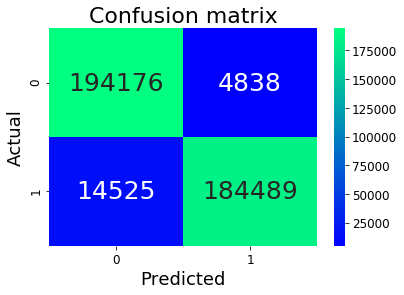

In [56]:
# Heatmap for Confusion Matrix
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.ylabel('Actual',fontsize = 18)
plt.xlabel('Predicted',fontsize = 18)

# ax.xaxis.set_ticklabels(['Genuine', 'Fraud']); 
# ax.yaxis.set_ticklabels(['Genuine', 'Fraud']);

plt.show()

In [57]:
metrics.roc_auc_score(y_train_smote , y_pred) 

0.9513526686564764

AUC -  0.9513526686564764 



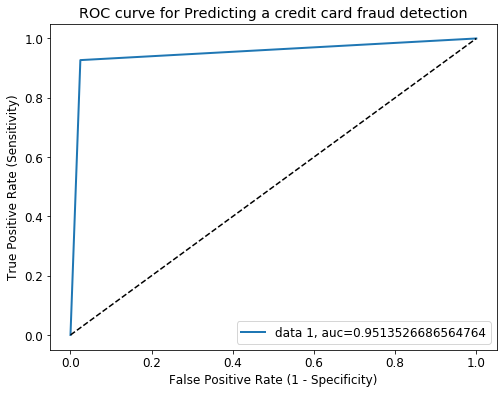

In [58]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_train_smote, y_pred)

auc = metrics.roc_auc_score(y_train_smote, y_pred)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

## Hyperparameter Tuning

In [59]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression()

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [20, 29], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [60]:
model.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  5.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [20, 29]},
             scoring='roc_auc', verbose=1)

In [61]:
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,14.799552,0.476726,0.000000,0.000000,0.1,l1,20,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,32
1,5.871641,0.354925,0.000000,0.000000,0.1,l1,29,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,19
2,19.597036,1.573880,0.273507,0.061889,0.1,l2,20,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.988781,0.989305,0.989544,0.988745,0.989209,0.989117,0.000309,9
3,21.597810,2.519653,0.352588,0.027931,0.1,l2,29,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.990605,0.990954,0.991073,0.990434,0.990821,0.990778,0.000232,8
4,13.171612,1.496987,0.000000,0.000000,0.5,l1,20,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
5,5.365229,0.089872,0.000000,0.000000,0.5,l1,29,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
6,19.630377,0.920690,0.267019,0.030486,0.5,l2,20,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.988782,0.989304,0.989543,0.988747,0.989207,0.989117,0.000308,10
7,20.619279,1.171588,0.366433,0.046139,0.5,l2,29,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.990648,0.991000,0.991097,0.990494,0.990853,0.990818,0.000222,7
8,13.954095,0.881517,0.000000,0.000000,1,l1,20,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,30
9,5.420896,0.741364,0.000000,0.000000,1,l1,29,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,29


In [62]:
# Best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9908235065142733
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2', 'pca__n_components': 29}


In [63]:
y_pred = model.predict(X_train_smote)

In [64]:
cm = confusion_matrix(y_train_smote, y_pred)
print(cm)

[[194177   4837]
 [ 14525 184489]]


AUC -  0.9513551810425398 



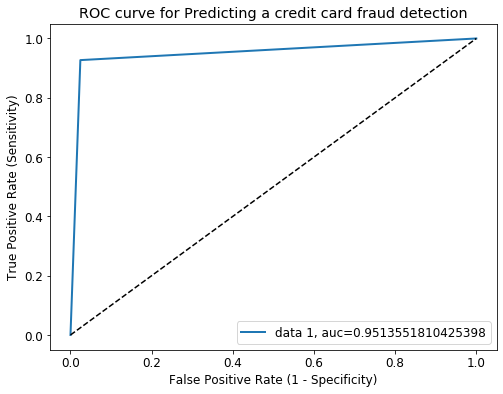

In [65]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_train_smote, y_pred)

auc = metrics.roc_auc_score(y_train_smote, y_pred)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

### 2. LR WITH ADASYN 

#### With Default Parameters

In [66]:
X_train_sk.shape

(199364, 29)

In [67]:
y_train.shape

(199364,)

In [68]:
# Initializing the adasyn 
ada = ADASYN(random_state = 0)


X_train_adasyn, y_train_adasyn = ada.fit_sample(X_train_sk, y_train)

In [69]:
# Checking shape
print(X_train_adasyn.shape)
print(y_train_adasyn.shape)

(398057, 29)
(398057,)


In [70]:
# Initializing Logistic Regression
logreg = LogisticRegression()

# Fitting the X_train and y_train into logistic regression
logreg.fit(X_train_adasyn, y_train_adasyn)

LogisticRegression()

In [71]:
# Predicting the values
y_pred = logreg.predict(X_train_adasyn)

In [72]:
# printing metrics using classification report
print(metrics.classification_report(y_train_adasyn, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89    199014
           1       0.91      0.87      0.89    199043

    accuracy                           0.89    398057
   macro avg       0.89      0.89      0.89    398057
weighted avg       0.89      0.89      0.89    398057



In [73]:
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_train_adasyn , y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_train_adasyn , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_train_adasyn , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_train_adasyn , y_pred)))
# print('Confusion Matrix : \n', cnf_matrix)
print("\n")

AUC : 0.88939
Precision : 0.90844
Recall : 0.86607
F1 : 0.88675




In [74]:
# making confusion matrix
cnf_matrix = metrics.confusion_matrix(y_train_adasyn,y_pred)
cnf_matrix

array([[181640,  17374],
       [ 26657, 172386]], dtype=int64)

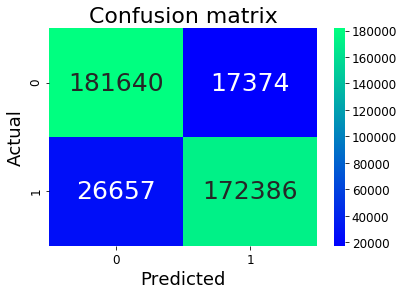

In [75]:
# Heatmap for Confusion Matrix
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.ylabel('Actual',fontsize = 18)
plt.xlabel('Predicted',fontsize = 18)

# ax.xaxis.set_ticklabels(['Genuine', 'Fraud']); 
# ax.yaxis.set_ticklabels(['Genuine', 'Fraud']);

plt.show()

In [76]:
# Printing ROC AUC score
metrics.roc_auc_score(y_train_adasyn , y_pred) 

0.8893868869758371

AUC -  0.8893868869758371 



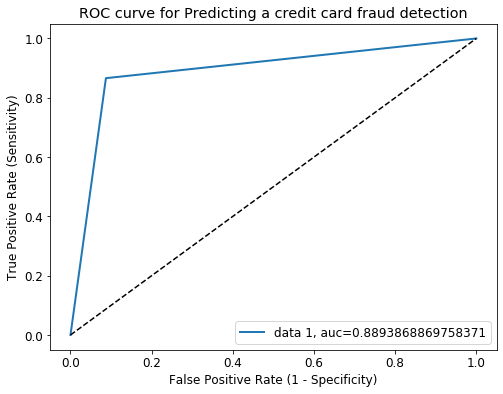

In [77]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_train_adasyn, y_pred)

auc = metrics.roc_auc_score(y_train_adasyn, y_pred)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

## Hyperparameter Tuning

In [78]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression()

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [20, 29], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [79]:
# Fitting X_train and y_tarin 
model.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  4.7min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [20, 29]},
             scoring='roc_auc', verbose=1)

In [80]:
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,14.766436,0.677687,0.000000,0.000000,0.1,l1,20,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,32
1,6.299698,0.389838,0.000000,0.000000,0.1,l1,29,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,19
2,18.307070,1.482475,0.249083,0.011131,0.1,l2,20,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.960403,0.960040,0.960681,0.959620,0.960289,0.960207,0.000358,9
3,16.304086,0.833580,0.342955,0.094470,0.1,l2,29,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.967180,0.967060,0.967605,0.966675,0.966651,0.967034,0.000353,8
4,14.124067,0.472114,0.000000,0.000000,0.5,l1,20,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
5,5.008569,0.199705,0.000000,0.000000,0.5,l1,29,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
6,18.205646,0.467918,0.298981,0.056001,0.5,l2,20,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.960403,0.960040,0.960680,0.959618,0.960286,0.960205,0.000359,10
7,16.407125,2.993874,0.332548,0.064282,0.5,l2,29,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.967205,0.967099,0.967644,0.966742,0.966670,0.967072,0.000351,7
8,14.979527,1.163446,0.000000,0.000000,1,l1,20,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,30
9,5.034750,0.285107,0.000000,0.000000,1,l1,29,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,29


In [81]:
# Best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9670798988754715
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2', 'pca__n_components': 29}


In [82]:
# predict on training data
y_pred = model.predict(X_train_adasyn)

In [83]:
# MAking confusion mtrix
cm = confusion_matrix(y_train_adasyn, y_pred)
print(cm)

[[181638  17376]
 [ 26655 172388]]


AUC -  0.8893868862437422 



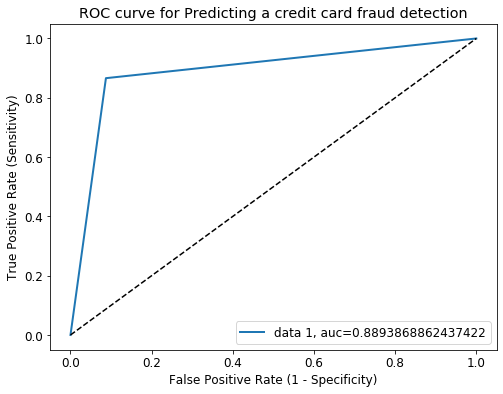

In [84]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_train_adasyn, y_pred)

auc = metrics.roc_auc_score(y_train_adasyn, y_pred)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

## LR with Random OverSampling

### With Default Parameters

In [85]:
# Checking the shape of X_train_sk
print(X_train_sk.shape)
print(y_train.shape)

(199364, 29)
(199364,)


In [86]:
# Initializing Random Oversampler'
randS = RandomOverSampler(random_state = 0)

X_train_random, y_train_random = randS.fit_sample(X_train_sk, y_train)

In [87]:
# Checking shape
print(X_train_random.shape)
print(y_train_random.shape)

(398028, 29)
(398028,)


In [88]:
# Initializing Logistic Regression
logreg = LogisticRegression()

# Fitting the X_train and y_train into logistic regression
logreg.fit(X_train_random, y_train_random)

LogisticRegression()

In [89]:
# Predicting the values
y_pred = logreg.predict(X_train_random)

In [90]:
# printing metrics using classification report
print(metrics.classification_report(y_train_random, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95    199014
           1       0.98      0.93      0.95    199014

    accuracy                           0.95    398028
   macro avg       0.95      0.95      0.95    398028
weighted avg       0.95      0.95      0.95    398028



In [91]:
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_train_random , y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_train_random , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_train_random , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_train_random , y_pred)))
# print('Confusion Matrix : \n', cnf_matrix)
print("\n")

AUC : 0.95179
Precision : 0.97556
Recall : 0.92679
F1 : 0.95055




In [92]:
# making confusion matrix
cnf_matrix = metrics.confusion_matrix(y_train_random,y_pred)
cnf_matrix

array([[194394,   4620],
       [ 14569, 184445]], dtype=int64)

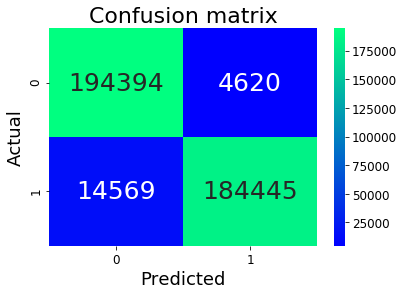

In [93]:
# Heatmap for Confusion Matrix
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.ylabel('Actual',fontsize = 18)
plt.xlabel('Predicted',fontsize = 18)

# ax.xaxis.set_ticklabels(['Genuine', 'Fraud']); 
# ax.yaxis.set_ticklabels(['Genuine', 'Fraud']);

plt.show()

In [94]:
# Printing ROC AUC score
metrics.roc_auc_score(y_train_random , y_pred) 

0.9517898238314892

AUC -  0.9517898238314892 



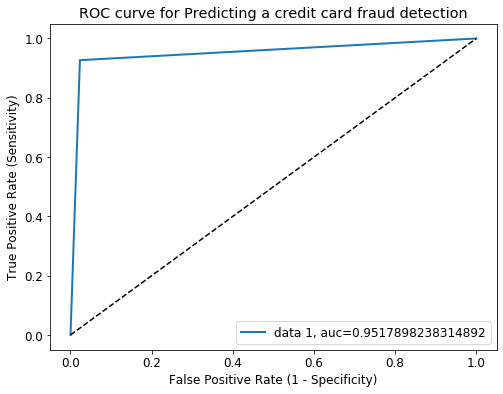

In [95]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_train_random, y_pred)

auc = metrics.roc_auc_score(y_train_random, y_pred)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

## Hyperparameter Tuning

In [96]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression()

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [22, 29], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [97]:
# Fitting X_train and y_tarin 
model.fit(X_train_random, y_train_random)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  5.0min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [22, 29]},
             scoring='roc_auc', verbose=1)

In [98]:
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,14.718708,1.103006,0.000000,0.000000,0.1,l1,22,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,32
1,6.352262,0.187261,0.000000,0.000000,0.1,l1,29,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,21
2,20.929627,1.661123,0.294807,0.032947,0.1,l2,22,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.988369,0.987590,0.988427,0.988726,0.988102,0.988243,0.000382,16
3,17.790484,0.378698,0.359032,0.059013,0.1,l2,29,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.990045,0.989155,0.989951,0.990089,0.989503,0.989748,0.000362,8
4,14.342776,0.508406,0.000000,0.000000,0.5,l1,22,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
5,5.206312,0.387358,0.000000,0.000000,0.5,l1,29,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
6,20.914432,1.129863,0.282816,0.029333,0.5,l2,22,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.988373,0.987592,0.988427,0.988730,0.988099,0.988244,0.000383,15
7,18.297792,1.247564,0.318650,0.046476,0.5,l2,29,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.990077,0.989196,0.989962,0.990119,0.989515,0.989774,0.000360,7
8,14.417397,0.553091,0.000000,0.000000,1,l1,22,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,30
9,5.454619,0.738540,0.000000,0.000000,1,l1,29,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,29


In [99]:
# Best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9897748083105317
Best hyperparameters:  {'logistic__C': 2, 'logistic__penalty': 'l2', 'pca__n_components': 29}


In [100]:
# predict on training data
y_pred = model.predict(X_train_random)

In [101]:
# MAking confusion mtrix
cm = confusion_matrix(y_train_random, y_pred)
print(cm)

[[194391   4623]
 [ 14569 184445]]


In [102]:
# check area under curve
y_pred_prob = model.predict_proba(X_train_random)[:, 1]

print("Accuracy    =>", roc_auc_score(y_train_random, y_pred_prob))
print("Sensitivity =>", cm[0,0]/(cm[0,0]+cm[0,1]))
print("Specificity =>", cm[1,1]/(cm[1,0]+cm[1,1]))

Accuracy    => 0.9897986485803282
Sensitivity => 0.9767704784588019
Specificity => 0.9267940948877968


AUC -  0.9517822866732994 



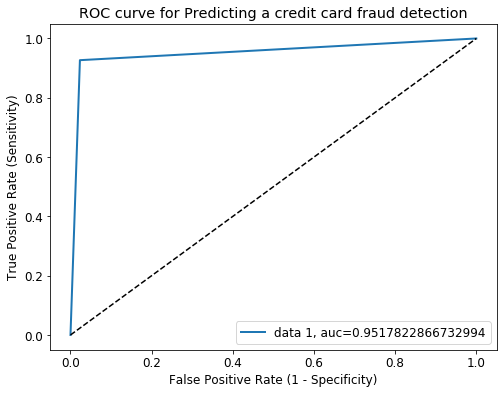

In [103]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_train_random, y_pred)

auc = metrics.roc_auc_score(y_train_random, y_pred)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

#### 1. Logistic Regression on Imbalance Dataset(Default Parameters): AUC Score = 0.85
#### 2. Logistic Regression on Imbalance Dataset(Hyperparameter Tuning): AUC Score = 0.916

#### 3. Logistic Regression on Balanced Dataset(SMOTE) (Default Parameters): AUC Score = 0.95
#### 4. Logistic Regression on Balanced Dataset(SMOTE) (Hyperparamter Tuning): AUC Score = 0.95

#### 5. Logistic Regression on Balanced Dataset(ADASYN) (Default Parameters): AUC Score = 0.889
#### 6. Logistic Regression on Balanced Dataset(ADASYN) (Hyperparamter Tuning): AUC Score = 0.889

#### 7. Logistic Regression on Balanced Dataset(RANDOM OVERSAMPLING) (Default Parameters): AUC Score = 0.95
#### 8. Logistic Regression on Balanced Dataset(RANDOM OVERSAMPLING) (Hyperparamter Tuning): AUC Score = 0.95


# DECISION TREES

## DT On Imbalanced Dataset

### With Default Parameters

In [104]:
#Checking the shape of X_train and y_train shape
print(X_train_sk.shape)
print(y_train.shape)

(199364, 29)
(199364,)


In [105]:
# Initializing the Decision Trees
dt_default = DecisionTreeClassifier(max_depth=5)

# Fitting the training   dataset 
dt_default.fit(X_train_sk, y_train)

DecisionTreeClassifier(max_depth=5)

In [106]:
# Making predictions
y_pred_default = dt_default.predict(X_train_sk)

# Printing classification report
print(classification_report(y_train, y_pred_default))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199014
           1       0.97      0.82      0.89       350

    accuracy                           1.00    199364
   macro avg       0.98      0.91      0.94    199364
weighted avg       1.00      1.00      1.00    199364



In [107]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_train,y_pred_default))
print(accuracy_score(y_train,y_pred_default))

[[199005      9]
 [    63    287]]
0.9996388515479224


In [108]:
# Printing ROC AUC score
metrics.roc_auc_score(y_train , y_pred_default) 

0.9099773885254304

AUC -  0.9099773885254304 



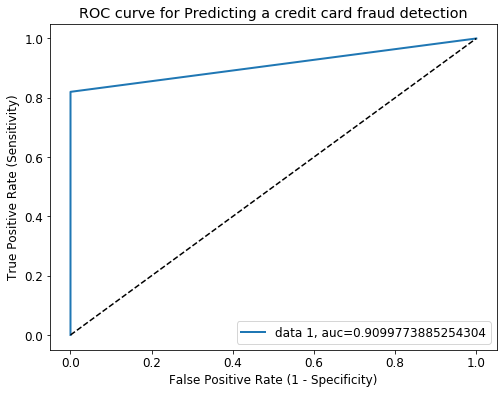

In [109]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred_default)

auc = metrics.roc_auc_score(y_train, y_pred_default)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

## Hyperparameter Tuning

In [118]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50)
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier(criterion = 'gini', random_state = 100)

folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = folds, return_train_score = True,
                           scoring = 'roc_auc',
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_sk, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  2.9min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [119]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.880738,0.168098,0.011573,0.000482,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.948097,0.931016,...,0.943875,0.012846,3,0.947889,0.968403,0.970884,0.950568,0.955738,0.958696,0.009321
1,2.748847,0.165122,0.011569,0.000798,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.948097,0.931016,...,0.943875,0.012846,3,0.947889,0.968403,0.970884,0.950568,0.955738,0.958696,0.009321
2,2.717731,0.109119,0.011369,0.001017,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.948299,0.930869,...,0.939738,0.007213,5,0.951679,0.968240,0.962958,0.960205,0.951662,0.958949,0.006479
3,2.782164,0.043378,0.012167,0.002394,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.948299,0.930869,...,0.939738,0.007213,5,0.951679,0.968240,0.962958,0.960205,0.951662,0.958949,0.006479
4,5.566153,0.090914,0.012367,0.000798,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.936581,0.925744,...,0.930016,0.007923,7,0.962909,0.990998,0.993934,0.981597,0.979642,0.981816,0.010894
5,5.605805,0.091217,0.012575,0.000797,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.936581,0.925744,...,0.930016,0.007923,7,0.962909,0.990998,0.993934,0.981597,0.979642,0.981816,0.010894
6,5.723606,0.184160,0.012774,0.000389,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.969412,0.939951,...,0.944494,0.013621,1,0.971771,0.990926,0.991677,0.981246,0.977235,0.982571,0.007741
7,6.305745,0.296179,0.014171,0.000750,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.969412,0.939951,...,0.944494,0.013621,1,0.971771,0.990926,0.991677,0.981246,0.977235,0.982571,0.007741


In [120]:
# printing the optimal accuracy score and hyperparameters
print("Best AUC: ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best AUC:  0.9444943965418309
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)


##### Running the model with best parameters

In [121]:
# model with optimal hyperparameters
clf_roc = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)
clf_roc.fit(X_train_sk, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

In [ ]:
y_predict_

### DECISION TREES WITH BALANCING TECHNIQUES

#### DT WITH SMOTE ALGORITHM

In [122]:
# Initializing SMOTE
smt = SMOTE()

# fit the data
X_train_dt_smote, y_train_dt_smote = smt.fit_sample(X_train_sk, y_train)

In [123]:
## Checking the sahpe
print(X_train_dt_smote.shape)
print(y_train_dt_smote.shape)

(398028, 29)
(398028,)


In [124]:
# Initializing decision tree
dt_default = DecisionTreeClassifier(max_depth=5)

# fitting the sets
dt_default.fit(X_train_dt_smote, y_train_dt_smote)

DecisionTreeClassifier(max_depth=5)

In [125]:
# Let's check the evaluation metrics of our default model


# Making predictions
y_pred_default = dt_default.predict(X_train_dt_smote)

# Printing classification report
print(classification_report(y_train_dt_smote, y_pred_default))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96    199014
           1       0.97      0.94      0.96    199014

    accuracy                           0.96    398028
   macro avg       0.96      0.96      0.96    398028
weighted avg       0.96      0.96      0.96    398028



In [126]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_train_dt_smote, y_pred_default))
print(accuracy_score(y_train_dt_smote, y_pred_default))

[[194059   4955]
 [ 12413 186601]]
0.956364878852744


In [127]:
# Printing ROC AUC score
metrics.roc_auc_score(y_train_dt_smote , y_pred_default) 

0.9563648788527439

AUC -  0.9563648788527439 



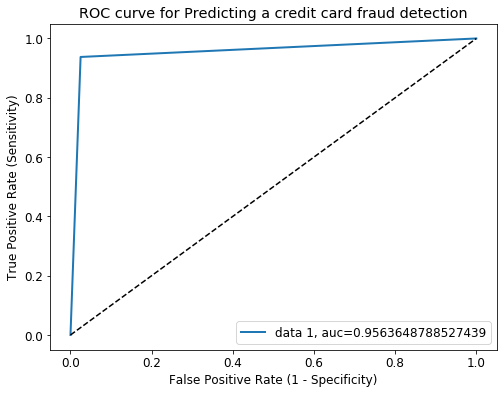

In [128]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_train_dt_smote, y_pred_default)

auc = metrics.roc_auc_score(y_train_dt_smote, y_pred_default)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

### Hyperparameter Tuning

In [129]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["gini"]
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid,
                           scoring = 'roc_auc',
                          cv = folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_dt_smote,y_train_dt_smote )

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  6.3min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [130]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.524135,0.137032,0.024803,0.003242,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.984693,0.985203,0.984927,0.985412,0.985428,0.985132,0.000285,5
1,5.661727,0.239472,0.024340,0.002052,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.984691,0.985198,0.984930,0.985412,0.985428,0.985132,0.000285,6
2,5.984660,0.180467,0.025131,0.002035,gini,5,100,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.984690,0.985166,0.984904,0.985403,0.985420,0.985117,0.000284,7
3,6.897348,0.450089,0.028124,0.001936,gini,5,100,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.984685,0.985166,0.984905,0.985403,0.985422,0.985116,0.000286,8
4,13.894948,1.153279,0.034113,0.005723,gini,10,50,50,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.997657,0.997902,0.997533,0.997703,0.997650,0.997689,0.000120,3
5,12.042624,0.643672,0.029524,0.002244,gini,10,50,100,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.997652,0.997917,0.997636,0.997661,0.997650,0.997703,0.000107,1
6,13.870241,0.848583,0.032713,0.003179,gini,10,100,50,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.997662,0.997853,0.997610,0.997860,0.997515,0.997700,0.000136,2
7,11.209605,0.434943,0.027128,0.001596,gini,10,100,100,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.997671,0.997801,0.997520,0.997860,0.997516,0.997674,0.000141,4


In [131]:
# printing the optimal accuracy score and hyperparameters
print("Best AUC: ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best AUC:  0.9977033405328231
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


##### Running the model with best parameters

In [132]:
# model with optimal hyperparameters
clf_auc = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)
clf_auc.fit(X_train_dt_smote, y_train_dt_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

### DT WITH ADASYN

In [133]:
## initializing adasyn
ads = ADASYN()

X_train_dt_adasyn, y_train_dt_adasyn = ads.fit_sample(X_train_sk, y_train)

In [134]:
print(X_train_dt_adasyn.shape)
print(y_train_dt_adasyn.shape)

(398057, 29)
(398057,)


#### Wih Imabalance dataset

In [135]:
# Initializing decision tree
dt_default = DecisionTreeClassifier(max_depth=5)

# fitting the sets
dt_default.fit(X_train_dt_adasyn, y_train_dt_adasyn)

DecisionTreeClassifier(max_depth=5)

In [136]:

# Let's check the evaluation metrics of our default model


# Making predictions
y_pred_default = dt_default.predict(X_train_dt_adasyn)

# Printing classification report
print(classification_report(y_train_dt_adasyn, y_pred_default))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89    199014
           1       0.87      0.93      0.90    199043

    accuracy                           0.90    398057
   macro avg       0.90      0.90      0.90    398057
weighted avg       0.90      0.90      0.90    398057



In [137]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_train_dt_adasyn, y_pred_default))
print(accuracy_score(y_train_dt_adasyn, y_pred_default))

[[170733  28281]
 [ 12998 186045]]
0.8962987712814999


In [138]:
# Printing ROC AUC score
metrics.roc_auc_score(y_train_dt_adasyn , y_pred_default) 

0.8962959735789884

AUC -  0.8962959735789884 



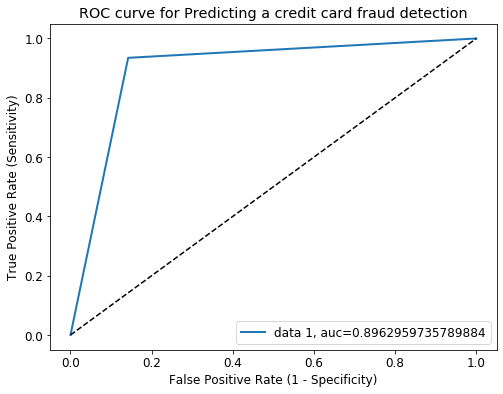

In [139]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_train_dt_adasyn, y_pred_default)

auc = metrics.roc_auc_score(y_train_dt_adasyn, y_pred_default)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

## Hyperparameter Tuning 

In [141]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["gini"]
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier(random_state = 100)

folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid,
                           scoring = 'roc_auc',
                          cv = folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_dt_adasyn, y_train_dt_adasyn)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  6.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'criterion': ['gini'], 'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [142]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.356667,0.108610,0.024935,0.001669,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.964333,0.960824,0.964247,0.962477,0.960911,0.962559,0.001532,5
1,5.439445,0.257055,0.025132,0.001934,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.964333,0.960824,0.964247,0.962477,0.960911,0.962559,0.001532,5
2,5.975955,0.298539,0.027128,0.001596,gini,5,100,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.964231,0.960777,0.964117,0.962356,0.960922,0.962481,0.001489,7
3,7.020094,0.705245,0.031309,0.003495,gini,5,100,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.964231,0.960777,0.964117,0.962356,0.960922,0.962481,0.001489,7
4,15.314909,0.298792,0.039476,0.001362,gini,10,50,50,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.992245,0.991480,0.993527,0.991666,0.992442,0.992272,0.000721,1
5,11.851359,0.584935,0.032711,0.003302,gini,10,50,100,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.992245,0.991480,0.993527,0.991666,0.992442,0.992272,0.000721,1
6,12.638170,1.282201,0.032109,0.004779,gini,10,100,50,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.991992,0.991271,0.993422,0.991508,0.992114,0.992061,0.000747,3
7,10.128917,0.539610,0.028790,0.004197,gini,10,100,100,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.991992,0.991271,0.993422,0.991508,0.992114,0.992061,0.000747,3


In [143]:
# printing the optimal accuracy score and hyperparameters
print("Best AUC: ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best AUC:  0.9922721507541086
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)


In [144]:
y_pred = grid_search.predict(X_train_dt_adasyn)

# Printing classification report
print(classification_report(y_train_dt_adasyn, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98    199014
           1       0.96      1.00      0.98    199043

    accuracy                           0.98    398057
   macro avg       0.98      0.98      0.98    398057
weighted avg       0.98      0.98      0.98    398057



### DT WITH RANDOM OVERSAMPLING

In [145]:
# Initializing Random Oversampler'
randS = RandomOverSampler(random_state = 0)

X_train_dt_random, y_train_dt_random = randS.fit_sample(X_train_sk, y_train)

#### Checking the metrics with default parameters

In [146]:
# Initializing decision tree
dt_ran_default = DecisionTreeClassifier(max_depth=5)

# fitting the sets
dt_ran_default.fit(X_train_dt_random, y_train_dt_random)

DecisionTreeClassifier(max_depth=5)

In [147]:
# Let's check the evaluation metrics of our default model


# Making predictions
y_pred_rand_default = dt_ran_default.predict(X_train_dt_random)

# Printing classification report
print(classification_report(y_train_dt_random, y_pred_rand_default))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97    199014
           1       0.98      0.96      0.97    199014

    accuracy                           0.97    398028
   macro avg       0.97      0.97      0.97    398028
weighted avg       0.97      0.97      0.97    398028



In [148]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_train_dt_random, y_pred_rand_default))
print(accuracy_score(y_train_dt_random, y_pred_rand_default))

[[194960   4054]
 [  8435 190579]]
0.9686228104555459


In [285]:
y_pred_ros = dt_ran_default.predict(X_train_dt_random)

In [286]:
# finding the ROC AUC score
metrics.roc_auc_score(y_train_dt_random , y_pred_ros)

0.9686228104555458

### HyperParameter Tuning

In [287]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["gini"]
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier(random_state = 100)

folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid,
                           scoring = 'roc_auc',
                          cv = folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_dt_random, y_train_dt_random)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  3.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'criterion': ['gini'], 'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [288]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.172714,0.071282,0.021345,0.001491,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.983289,0.986092,0.987433,0.987421,0.987574,0.986362,0.001628,5
1,3.190067,0.060227,0.021942,0.002091,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.983289,0.986092,0.987433,0.987421,0.987574,0.986362,0.001628,5
2,3.417460,0.071012,0.022541,0.001196,gini,5,100,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.983220,0.986092,0.987433,0.987388,0.987515,0.986330,0.001641,7
3,3.573841,0.106219,0.023339,0.002327,gini,5,100,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.983220,0.986092,0.987433,0.987388,0.987515,0.986330,0.001641,7
4,6.168900,0.278873,0.026827,0.001738,gini,10,50,50,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.999388,0.999493,0.999582,0.999360,0.999257,0.999416,0.000112,3
5,7.623408,0.645862,0.030719,0.002706,gini,10,50,100,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.999388,0.999493,0.999582,0.999360,0.999257,0.999416,0.000112,3
6,7.787170,0.561420,0.029962,0.002132,gini,10,100,50,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.999373,0.999619,0.999691,0.999491,0.999499,0.999534,0.000110,1
7,6.410054,0.368155,0.026330,0.001353,gini,10,100,100,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.999373,0.999619,0.999691,0.999491,0.999499,0.999534,0.000110,1


In [289]:
# printing the optimal accuracy score and hyperparameters
print("Best AUC: ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best AUC:  0.9995343247402724
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)


In [290]:

y_pred_rand_dt = grid_search.predict(X_train_dt_random)

# Printing classification report
print(classification_report(y_train_dt_random, y_pred_rand_dt))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    199014
           1       0.99      1.00      1.00    199014

    accuracy                           1.00    398028
   macro avg       1.00      1.00      1.00    398028
weighted avg       1.00      1.00      1.00    398028



#### Decision Trees With Default Parameters (Imbalanced Dataset): AUC = 0.90
#### Decision Trees With Hyperparameters (Imbalanced Dataset): AUC = 0.94

#### Decision Trees With Default Parameters (Balanced Dataset) With SMOTE: AUC = 0.95
#### Decision Trees With  Hyperparameters (Balanced Dataset) With SMOTE: AUC = 0.0.997

#### Decision Trees With Default Parameters (Balanced Dataset) With ADASYN: AUC = 0.895
#### Decision Trees With HyperParameters (Balanced Dataset) With ADASYN: AUC = 0.992

#### Decision Trees With Default Parameters (Balanced Dataset) With RANDOM OVERSAMPLING: AUC = 0.9686
#### Decision Trees With HyperParameters (Balanced Dataset) With RANDOM OVERSAMPLING: AUC = 0.9995



# RANDOM FOREST

### Checking Metrics with Imbalanced Dataset

In [150]:
# Checking the shape of dataset
print(X_train_sk.shape)
print(y_train.shape)

(199364, 29)
(199364,)


#### Running the Random Forest with default parameters

In [151]:
# Initializing the random forest
rfc = RandomForestClassifier()

# fitting the dataset
rfc.fit(X_train_sk, y_train)

RandomForestClassifier()

In [152]:
# making predictions
predictions = rfc.predict(X_train_sk)

In [153]:
# Let's check the report of our default model
print(classification_report(y_train,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199014
           1       1.00      1.00      1.00       350

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364



In [154]:
# Printing confusion matrix
print(confusion_matrix(y_train, predictions))

[[199014      0]
 [     0    350]]


In [155]:
# ROC AUC score
y_pred_prob_defr = rfc.predict(X_train_sk)

In [156]:
metrics.roc_auc_score(y_train , y_pred_prob_defr)

1.0

AUC -  1.0 



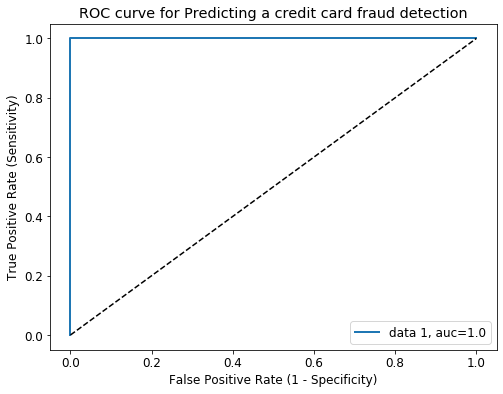

In [159]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred_prob_defr)

auc = metrics.roc_auc_score(y_train, y_pred_prob_defr)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

### Hyperparameterv Tuning

In [160]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier(random_state = 100, criterion = 'gini')
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1, scoring = 'roc_auc')

grid_search.fit(X_train_sk, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 151.6min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 200.7min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=1)

In [162]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,55.332002,1.600159,0.792885,0.067449,4,5,100,200,100,"{'max_depth': 4, 'max_features': 5, 'min_sampl...",0.976680,0.956862,0.971948,0.968497,0.008451,60
1,114.964563,2.267798,1.898578,0.115241,4,5,100,200,200,"{'max_depth': 4, 'max_features': 5, 'min_sampl...",0.972021,0.955152,0.970587,0.965920,0.007637,68
2,224.769588,5.691746,3.405557,0.539833,4,5,100,200,300,"{'max_depth': 4, 'max_features': 5, 'min_sampl...",0.975651,0.957549,0.970446,0.967882,0.007609,63
3,74.694488,19.394521,1.069666,0.104103,4,5,100,400,100,"{'max_depth': 4, 'max_features': 5, 'min_sampl...",0.975269,0.955255,0.971068,0.967197,0.008617,66
4,180.811435,5.276449,2.600377,0.108980,4,5,100,400,200,"{'max_depth': 4, 'max_features': 5, 'min_sampl...",0.972095,0.952957,0.970114,0.965055,0.008593,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,709.350461,23.528073,2.395592,0.028640,10,10,300,200,200,"{'max_depth': 10, 'max_features': 10, 'min_sam...",0.973901,0.962289,0.970082,0.968757,0.004832,53
68,1080.114297,95.440647,3.941910,0.699166,10,10,300,200,300,"{'max_depth': 10, 'max_features': 10, 'min_sam...",0.974357,0.961650,0.970658,0.968888,0.005336,50
69,347.066410,12.723998,1.386956,0.035094,10,10,300,400,100,"{'max_depth': 10, 'max_features': 10, 'min_sam...",0.972739,0.965828,0.970182,0.969583,0.002853,38
70,816.351216,15.486260,2.477028,0.624849,10,10,300,400,200,"{'max_depth': 10, 'max_features': 10, 'min_sam...",0.973901,0.962289,0.970082,0.968757,0.004832,53


In [163]:
# printing the optimal accuracy score and hyperparameters
print("Best AUC: ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best AUC:  0.9725556409544679
RandomForestClassifier(max_depth=8, max_features=10, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=300,
                       random_state=100)


## Random Forest with Balancing Techniques

### RF With SMOTE

In [164]:
# Initialisng smote
sm = SMOTE()

# fitting the training set
X_train_rf_smote, y_train_rf_smote = ads.fit_sample(X_train_sk, y_train)

In [165]:
## Checking the sahpe
print(X_train_rf_smote.shape)
print(y_train_rf_smote.shape)

(398057, 29)
(398057,)


In [167]:
# Initializing decision tree
rfc = RandomForestClassifier()

# fitting the sets
rfc.fit(X_train_rf_smote, y_train_rf_smote)

RandomForestClassifier()

In [168]:
# Making predictions
predictions = rfc.predict(X_train_rf_smote)

In [169]:
# Let's check the report of our default model
print(classification_report(y_train_rf_smote, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199014
           1       1.00      1.00      1.00    199043

    accuracy                           1.00    398057
   macro avg       1.00      1.00      1.00    398057
weighted avg       1.00      1.00      1.00    398057



In [170]:
# Printing confusion matrix
print(confusion_matrix(y_train_rf_smote, predictions))

[[199014      0]
 [     0 199043]]


In [171]:
metrics.roc_auc_score(y_train_rf_smote , predictions) 

1.0

### HYperparameter Tuning

In [172]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier(random_state = 100)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1, scoring = 'roc_auc')

In [173]:
grid_search.fit(X_train_rf_smote, y_train_rf_smote)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 30.2min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 331.0min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 442.2min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=1)

In [174]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,180.910939,1.193310,2.912758,0.199269,4,5,100,200,100,"{'max_depth': 4, 'max_features': 5, 'min_sampl...",0.966387,0.936118,0.965476,0.955994,0.014059,58
1,365.067385,2.609619,5.965459,0.207561,4,5,100,200,200,"{'max_depth': 4, 'max_features': 5, 'min_sampl...",0.970424,0.935919,0.963993,0.956779,0.014982,54
2,544.355571,11.974143,8.434997,0.352847,4,5,100,200,300,"{'max_depth': 4, 'max_features': 5, 'min_sampl...",0.970530,0.937521,0.963031,0.957027,0.014129,49
3,181.305590,2.783289,3.252608,0.278899,4,5,100,400,100,"{'max_depth': 4, 'max_features': 5, 'min_sampl...",0.965679,0.936226,0.966400,0.956102,0.014057,57
4,362.719416,4.969878,5.753242,0.279993,4,5,100,400,200,"{'max_depth': 4, 'max_features': 5, 'min_sampl...",0.970130,0.935536,0.964686,0.956784,0.015188,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,3127.811675,29.871936,5.853416,0.297530,10,10,300,200,200,"{'max_depth': 10, 'max_features': 10, 'min_sam...",0.991682,0.977999,0.989947,0.986542,0.006083,19
68,3028.051891,925.755309,9.408524,1.132791,10,10,300,200,300,"{'max_depth': 10, 'max_features': 10, 'min_sam...",0.991796,0.978240,0.989897,0.986644,0.005993,17
69,589.890630,7.831934,3.289767,0.385799,10,10,300,400,100,"{'max_depth': 10, 'max_features': 10, 'min_sam...",0.991612,0.975853,0.989721,0.985728,0.007026,23
70,1118.007373,25.692022,4.921861,0.498564,10,10,300,400,200,"{'max_depth': 10, 'max_features': 10, 'min_sam...",0.991682,0.977999,0.989947,0.986542,0.006083,19


In [175]:
# printing the optimal AUC score and hyperparameters
print("Best AUC: ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best AUC:  0.9888498546380181
RandomForestClassifier(max_depth=10, max_features=5, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=200,
                       random_state=100)


In [176]:
y_pred_rf = grid_search.predict(X_train_rf_smote)

# Printing classification report
print(classification_report(y_train_rf_smote, y_pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    199014
           1       0.99      0.99      0.99    199043

    accuracy                           0.99    398057
   macro avg       0.99      0.99      0.99    398057
weighted avg       0.99      0.99      0.99    398057



In [177]:
# Printing confusion matrix
print(confusion_matrix(y_train_rf_smote, y_pred_rf))

[[197471   1543]
 [  1349 197694]]


In [178]:
metrics.roc_auc_score(y_train_rf_smote , y_pred_rf)

0.9927346733030592

## RF With ADASYN

In [179]:
# Initialisng smote
ads = ADASYN()

# fitting the training set
X_train_rf_adasyn, y_train_rf_adasyn = ads.fit_sample(X_train_sk, y_train)

In [180]:
## Checking the sahpe
print(X_train_rf_adasyn.shape)
print(y_train_rf_adasyn.shape)

(398057, 29)
(398057,)


In [181]:
# Initializing decision tree
rfc = RandomForestClassifier()

# fitting the sets
rfc.fit(X_train_rf_adasyn, y_train_rf_adasyn)

RandomForestClassifier()

In [182]:
# Making predictions
predictions_rf = rfc.predict(X_train_rf_adasyn)

In [183]:
# Let's check the report of our default model
print(classification_report(y_train_rf_adasyn, predictions_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199014
           1       1.00      1.00      1.00    199043

    accuracy                           1.00    398057
   macro avg       1.00      1.00      1.00    398057
weighted avg       1.00      1.00      1.00    398057



In [184]:
# Checking ROC Score
metrics.roc_auc_score(y_train_rf_adasyn , predictions_rf) 

1.0

### ADASYN With Hyperparameter tuning 

In [185]:
# Create the parameter grid based on the results of random search
cv_num = StratifiedKFold(3)
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 100),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier(random_state = 100)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = cv_num, n_jobs = -1,verbose = 1, scoring = 'roc_auc')

grid_search.fit(X_train_rf_adasyn, y_train_rf_adasyn)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 26.3min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 596.7min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed: 956.6min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=100), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 400, 100),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=1)

In [186]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,172.479045,8.665329,2.684530,0.248811,4,5,100,200,100,"{'max_depth': 4, 'max_features': 5, 'min_sampl...",0.967140,0.937367,0.963535,0.956014,0.013267,85
1,334.526369,1.811268,5.264630,0.341148,4,5,100,200,200,"{'max_depth': 4, 'max_features': 5, 'min_sampl...",0.969033,0.935298,0.964149,0.956160,0.014886,78
2,511.703299,7.583703,8.184045,0.282163,4,5,100,200,300,"{'max_depth': 4, 'max_features': 5, 'min_sampl...",0.969356,0.937223,0.962164,0.956248,0.013769,75
3,173.927054,2.150623,2.584979,0.054659,4,5,100,400,100,"{'max_depth': 4, 'max_features': 5, 'min_sampl...",0.965814,0.937027,0.964965,0.955936,0.013375,88
4,345.247455,7.064399,5.222953,0.322873,4,5,100,400,200,"{'max_depth': 4, 'max_features': 5, 'min_sampl...",0.968049,0.936163,0.964141,0.956118,0.014200,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,1211.598121,14.098662,6.809510,0.843826,10,10,300,200,200,"{'max_depth': 10, 'max_features': 10, 'min_sam...",0.991340,0.976626,0.990156,0.986041,0.006675,31
104,1843.402968,18.692078,8.985688,0.543323,10,10,300,200,300,"{'max_depth': 10, 'max_features': 10, 'min_sam...",0.991455,0.976827,0.989712,0.985998,0.006524,33
105,623.577701,16.960934,3.584101,0.499680,10,10,300,400,100,"{'max_depth': 10, 'max_features': 10, 'min_sam...",0.991330,0.976157,0.990397,0.985961,0.006943,35
106,1249.728933,32.188688,4.495603,0.569260,10,10,300,400,200,"{'max_depth': 10, 'max_features': 10, 'min_sam...",0.991340,0.976626,0.990156,0.986041,0.006675,31


In [187]:
# printing the optimal AUC score and hyperparameters
print("Best AUC: ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best AUC:  0.9888874386147674
RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=300,
                       random_state=100)


In [199]:
y_pred_rf_ada = grid_search.predict(X_train_rf_adasyn)

# Printing classification report
print(classification_report(y_train_rf_smote, y_pred_rf_ada))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85    199014
           1       1.00      0.65      0.79    199043

    accuracy                           0.83    398057
   macro avg       0.87      0.83      0.82    398057
weighted avg       0.87      0.83      0.82    398057



In [189]:
metrics.roc_auc_score(y_train_rf_smote , y_pred_rf_ada)

0.995608481304519

### RF With Random OverSampling

In [190]:
# Initializing Random Oversampler'
randS = RandomOverSampler(random_state = 0)

X_train_rf_random, y_train_rf_random = randS.fit_sample(X_train_sk, y_train)

In [191]:
## Checking the sahpe
print(X_train_rf_random.shape)
print(y_train_rf_random.shape)

(398028, 29)
(398028,)


In [192]:
# Initializing decision tree
rfc = RandomForestClassifier()

# fitting the sets with default hyperparameters
rfc.fit(X_train_rf_random, y_train_rf_random)

RandomForestClassifier()

In [193]:
# Making predictions
predictions_rf_ros = rfc.predict(X_train_rf_random)

In [194]:
# Let's check the report of our default model
print(classification_report(y_train_rf_random, predictions_rf_ros))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199014
           1       1.00      1.00      1.00    199014

    accuracy                           1.00    398028
   macro avg       1.00      1.00      1.00    398028
weighted avg       1.00      1.00      1.00    398028



In [195]:
# Checking ROC Score
metrics.roc_auc_score(y_train_rf_random , predictions_rf_ros) 

1.0

### HyperParameter Tuning

In [196]:
# Create the parameter grid based on the results of random search
cv_num = StratifiedKFold(3)
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier(random_state = 100)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = cv_num, n_jobs = -1,verbose = 1, scoring = 'roc_auc')

# Fitting the train set
grid_search.fit(X_train_rf_random, y_train_rf_random)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 22.0min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 330.9min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 385.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=100), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=1)

In [197]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results  

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,79.196135,0.059713,2.005967,0.006112,4,5,100,200,100,"{'max_depth': 4, 'max_features': 5, 'min_sampl...",0.991239,0.991455,0.991927,0.991541,0.000288,52
1,230.135985,9.203544,6.797185,0.268121,4,5,100,200,200,"{'max_depth': 4, 'max_features': 5, 'min_sampl...",0.991491,0.991548,0.991764,0.991601,0.000118,50
2,378.387171,13.246014,9.066925,1.921350,4,5,100,200,300,"{'max_depth': 4, 'max_features': 5, 'min_sampl...",0.991417,0.991391,0.991654,0.991487,0.000118,54
3,142.098376,11.473417,4.283210,0.411871,4,5,100,400,100,"{'max_depth': 4, 'max_features': 5, 'min_sampl...",0.991074,0.991409,0.992010,0.991497,0.000387,53
4,268.915496,17.864389,5.544098,0.987328,4,5,100,400,200,"{'max_depth': 4, 'max_features': 5, 'min_sampl...",0.991465,0.991583,0.991870,0.991640,0.000170,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,825.803881,9.061295,6.395893,1.100345,10,10,300,200,200,"{'max_depth': 10, 'max_features': 10, 'min_sam...",0.999842,0.999872,0.999848,0.999854,0.000013,13
68,1235.789201,24.825911,8.185772,2.114971,10,10,300,200,300,"{'max_depth': 10, 'max_features': 10, 'min_sam...",0.999849,0.999867,0.999843,0.999853,0.000010,15
69,404.764668,8.513689,3.016598,0.231038,10,10,300,400,100,"{'max_depth': 10, 'max_features': 10, 'min_sam...",0.999810,0.999869,0.999843,0.999841,0.000024,17
70,803.930241,11.046041,5.099692,1.472958,10,10,300,400,200,"{'max_depth': 10, 'max_features': 10, 'min_sam...",0.999842,0.999872,0.999848,0.999854,0.000013,13


In [198]:
# printing the optimal AUC score and hyperparameters
print("Best AUC: ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best AUC:  0.9999330025207213
RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=300,
                       random_state=100)


In [200]:
y_pred_rf_ada = grid_search.predict(X_train_rf_random)

# Printing classification report
print(classification_report(y_train_rf_random, y_pred_rf_ada))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    199014
           1       1.00      0.99      1.00    199014

    accuracy                           1.00    398028
   macro avg       1.00      1.00      1.00    398028
weighted avg       1.00      1.00      1.00    398028



In [201]:
metrics.roc_auc_score(y_train_rf_random , y_pred_rf_ada)

0.9965605434793533

#### Random Forest With Default Parameters (Imbalanced Dataset) : AUC = 1.0
#### Random Forest With HyperParameters (Imbalanced Dataset) : AUC = 0.9725

#### Random Forest With Default Parameters (Balanced Dataset) With SMOTE : AUC = 1.0
#### Random Forest With HyperParameters (Balanced Dataset) With SMOTE : AUC = 0.9884

#### Random Forest With Default Parameters (Balanced Dataset) With ADASYN : AUC = 1.0
#### Random Forest With HyperParameters (Balanced Dataset) With ADASYN : AUC = 0.9888

#### Random Forest With Default Parameters (Balanced Dataset) With RANDOM OVERSAMPLING : AUC = 1.0
#### Random Forest With HyperParameters (Balanced Dataset) With RANDOM OVERSAMPLING : AUC = 0.9999


# XGBOOST

### XGBOOST With Imbalanced Dataset

In [209]:
# Initializing the random forest
xgb = XGBClassifier()

# fitting the dataset
xgb.fit(X_train_sk, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [210]:
predictions_xgb = xgb.predict(X_train_sk)

In [211]:
# Let's check the report of our default model
print(classification_report(y_train,predictions_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199014
           1       1.00      1.00      1.00       350

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364



In [212]:
metrics.roc_auc_score(y_train , predictions_xgb)

1.0

### Hyperparameter Tuning With Imbalance Dataset

In [215]:
# Create the parameter grid based on the results of random search
cv_num = StratifiedKFold(3)
param_grid = {
    'max_depth': [4,8,10],
    'learning_rate' : [0.1, 0.01, 0.05],
    'n_estimators': [100,200, 300], 
}

# instantiate a random forest classifier
rfc = RandomForestClassifier(n_estimators = 100, max_depth = 5, warm_start = True)

# Create a based model
xgb = XGBClassifier(base_estimator = rfc, random_state = 100)
# Instantiate the grid search model
grid_search_xgb = GridSearchCV(estimator = xgb, param_grid = param_grid, 
                          cv = cv_num, n_jobs = -1,verbose = 1, scoring = 'roc_auc')

# Fitting the train set
grid_search_xgb.fit(X_train_sk, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 27.5min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed: 500.8min finished


[05:25:07] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_estimator=RandomForestClassifier(max_depth=5,
                                                                           warm_start=True),
                                     base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rat...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=100,
                                     reg_alpha=None, reg_lamb

In [216]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results  

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,79.196135,0.059713,2.005967,0.006112,4,5,100,200,100,"{'max_depth': 4, 'max_features': 5, 'min_sampl...",0.991239,0.991455,0.991927,0.991541,0.000288,52
1,230.135985,9.203544,6.797185,0.268121,4,5,100,200,200,"{'max_depth': 4, 'max_features': 5, 'min_sampl...",0.991491,0.991548,0.991764,0.991601,0.000118,50
2,378.387171,13.246014,9.066925,1.921350,4,5,100,200,300,"{'max_depth': 4, 'max_features': 5, 'min_sampl...",0.991417,0.991391,0.991654,0.991487,0.000118,54
3,142.098376,11.473417,4.283210,0.411871,4,5,100,400,100,"{'max_depth': 4, 'max_features': 5, 'min_sampl...",0.991074,0.991409,0.992010,0.991497,0.000387,53
4,268.915496,17.864389,5.544098,0.987328,4,5,100,400,200,"{'max_depth': 4, 'max_features': 5, 'min_sampl...",0.991465,0.991583,0.991870,0.991640,0.000170,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,825.803881,9.061295,6.395893,1.100345,10,10,300,200,200,"{'max_depth': 10, 'max_features': 10, 'min_sam...",0.999842,0.999872,0.999848,0.999854,0.000013,13
68,1235.789201,24.825911,8.185772,2.114971,10,10,300,200,300,"{'max_depth': 10, 'max_features': 10, 'min_sam...",0.999849,0.999867,0.999843,0.999853,0.000010,15
69,404.764668,8.513689,3.016598,0.231038,10,10,300,400,100,"{'max_depth': 10, 'max_features': 10, 'min_sam...",0.999810,0.999869,0.999843,0.999841,0.000024,17
70,803.930241,11.046041,5.099692,1.472958,10,10,300,400,200,"{'max_depth': 10, 'max_features': 10, 'min_sam...",0.999842,0.999872,0.999848,0.999854,0.000013,13


In [217]:
# printing the optimal AUC score and hyperparameters
print("Best AUC: ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best AUC:  0.9999330025207213
RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=300,
                       random_state=100)


In [218]:
y_pred_xg = grid_search.predict(X_train_sk)

# Printing classification report
print(classification_report(y_train, y_pred_xg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199014
           1       0.59      0.99      0.74       350

    accuracy                           1.00    199364
   macro avg       0.79      1.00      0.87    199364
weighted avg       1.00      1.00      1.00    199364



In [219]:
metrics.roc_auc_score(y_train , y_pred_xg)

0.9965348597155405

## XGBOOST WITH BALANCED DATASET

### XGB WITH SMOTE 

### Without Hyperparameter Tuning

In [220]:
# Initialisng smote
sm = SMOTE()

# fitting the training set
X_train_xg_smote, y_train_xg_smote = sm.fit_sample(X_train_sk, y_train)

In [221]:
# Checking the shape
print(X_train_xg_smote.shape)
print(y_train_xg_smote.shape)

(398028, 29)
(398028,)


In [223]:
# Initializing XGBoost
xgb_smote = XGBClassifier()

# fitting the sets
xgb_smote.fit(X_train_xg_smote, y_train_xg_smote)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [225]:
# Making predictions
predictions_smote = xgb_smote.predict(X_train_xg_smote)

In [226]:
# Let's check the report of our default model
print(classification_report(y_train_xg_smote, predictions_smote))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199014
           1       1.00      1.00      1.00    199014

    accuracy                           1.00    398028
   macro avg       1.00      1.00      1.00    398028
weighted avg       1.00      1.00      1.00    398028



In [227]:
# Printing confusion matrix
print(confusion_matrix(y_train_xg_smote, predictions_smote))

[[199012      2]
 [     0 199014]]


In [228]:
metrics.roc_auc_score(y_train_xg_smote , predictions_smote)

0.9999949752278734

### With Hyperparameter Tuning

In [230]:
# Create the parameter grid based on the results of random search
cv_num = StratifiedKFold(3)
param_grid = {
    'max_depth': [4,8,10],
    'learning_rate' : [0.1, 0.01, 0.05],
    'n_estimators': [100,200, 300]
}

# instantiate a random forest classifier
xgb = XGBClassifier()

# Create a based model
xgb = XGBClassifier(base_estimator = xgb, random_state = 100)
# Instantiate the grid search model
grid_search_xgb_smote = GridSearchCV(estimator = xgb, param_grid = param_grid, 
                          cv = cv_num, n_jobs = -1,verbose = 1, scoring = 'roc_auc')

# Fitting the train set
grid_search_xgb_smote.fit(X_train_xg_smote, y_train_xg_smote)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 147.2min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed: 301.0min finished


[17:39:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_estimator=XGBClassifier(base_score=None,
                                                                  booster=None,
                                                                  colsample_bylevel=None,
                                                                  colsample_bynode=None,
                                                                  colsample_bytree=None,
                                                                  gamma=None,
                                                                  gpu_id=None,
                                                                  importance_type='gain',
                                                                  interaction_constraints=None,
                                                                  learning_rate=None,
                                                             

In [232]:
# cv results
cv_results = pd.DataFrame(grid_search_xgb_smote.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,419.954414,2.376264,1.716393,0.102050,0.1,4,100,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",0.999700,0.999743,0.999683,0.999709,0.000025,21
1,2676.192234,5.114429,3.016953,0.290322,0.1,4,200,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",0.999925,0.999960,0.999934,0.999939,0.000015,13
2,3066.152900,8.604717,5.400250,0.253251,0.1,4,300,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",0.999967,0.999988,0.999973,0.999976,0.000009,10
3,2015.782809,883.707314,3.373076,0.279041,0.1,8,100,"{'learning_rate': 0.1, 'max_depth': 8, 'n_esti...",0.999974,0.999985,0.999970,0.999976,0.000006,9
4,1518.629194,9.243305,7.506295,0.664879,0.1,8,200,"{'learning_rate': 0.1, 'max_depth': 8, 'n_esti...",0.999986,0.999995,0.999990,0.999990,0.000004,4
5,2116.094645,14.440004,10.607959,0.075236,0.1,8,300,"{'learning_rate': 0.1, 'max_depth': 8, 'n_esti...",0.999987,0.999997,0.999991,0.999992,0.000004,1
6,942.380794,3.027764,3.050605,0.728731,0.1,10,100,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est...",0.999969,0.999990,0.999975,0.999978,0.000009,7
7,2991.319177,16.356183,7.643887,2.518729,0.1,10,200,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est...",0.999984,0.999996,0.999991,0.999990,0.000005,3
8,3620.844980,46.455807,11.213006,0.824998,0.1,10,300,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est...",0.999984,0.999997,0.999993,0.999991,0.000005,2
9,866.559068,576.220346,1.515280,0.247448,0.01,4,100,"{'learning_rate': 0.01, 'max_depth': 4, 'n_est...",0.992893,0.992442,0.992940,0.992758,0.000225,27


In [234]:
# printing the optimal AUC score and hyperparameters
print("Best AUC: ", grid_search.best_score_)
print(grid_search_xgb_smote.best_estimator_)

Best AUC:  0.9999330025207213
XGBClassifier(base_estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_job...
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.

In [236]:
y_pred_xg_smote = grid_search.predict(X_train_xg_smote)

# Printing classification report
print(classification_report(y_train_xg_smote, y_pred_xg_smote))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96    199014
           1       1.00      0.91      0.95    199014

    accuracy                           0.96    398028
   macro avg       0.96      0.96      0.96    398028
weighted avg       0.96      0.96      0.96    398028



In [237]:
# 
metrics.roc_auc_score(y_train_xg_smote , y_pred_xg_smote)

0.9561035907021617

### XGB With ADASYN

### With Default Parameters

In [238]:
# Initialisng smote
ads = ADASYN()

# fitting the training set
X_train_xg_adasyn, y_train_xg_adasyn = ads.fit_sample(X_train_sk, y_train)

In [239]:
# Initializing XGBoost
xgb_adasyn = XGBClassifier()

# fitting the sets
xgb_adasyn.fit(X_train_xg_adasyn, y_train_xg_adasyn)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [240]:
# Making predictions
predictions_adasyn = xgb_adasyn.predict(X_train_xg_adasyn)

In [241]:
# Let's check the report of our default model
print(classification_report(y_train_xg_adasyn, predictions_adasyn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199014
           1       1.00      1.00      1.00    199043

    accuracy                           1.00    398057
   macro avg       1.00      1.00      1.00    398057
weighted avg       1.00      1.00      1.00    398057



In [242]:
metrics.roc_auc_score(y_train_xg_adasyn , predictions_adasyn)

0.9999949752278734

### With Hyperparameter Tuning

In [243]:
# Create the parameter grid based on the results of random search
cv_num = StratifiedKFold(3)
param_grid = {
    'max_depth': [4, 8, 10],
    'learning_rate' : [0.1, 0.01, 0.05],
    'n_estimators': [100, 200, 300]
}

# instantiate a random forest classifier

# Create a based model
xgb = XGBClassifier(base_estimator = xgb, random_state = 100)
# Instantiate the grid search model
grid_search_xgb_adasyn = GridSearchCV(estimator = xgb, param_grid = param_grid, 
                          cv = cv_num, n_jobs = -1, verbose = 1, scoring = 'roc_auc')

# Fitting the train set
grid_search_xgb_adasyn.fit(X_train_xg_adasyn, y_train_xg_adasyn)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 133.4min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed: 668.9min finished


[07:32:24] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_estimator=XGBClassifier(base_estimator=XGBClassifier(base_score=None,
                                                                                               booster=None,
                                                                                               colsample_bylevel=None,
                                                                                               colsample_bynode=None,
                                                                                               colsample_bytree=None,
                                                                                               gamma=None,
                                                                                               gpu_id=None,
                                                                                               importance_type='gain',
           

In [244]:
# cv results
cv_results = pd.DataFrame(grid_search_xgb_adasyn.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,289.572319,16.002232,1.196467,0.026478,0.1,4,100,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",0.987396,0.986268,0.989220,0.987628,0.001216,15
1,647.646411,30.983462,2.883620,0.498332,0.1,4,200,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",0.989459,0.996118,0.994644,0.993407,0.002856,12
2,1176.850775,242.749722,4.287864,1.377797,0.1,4,300,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",0.990357,0.998186,0.998087,0.995544,0.003668,7
3,867.111064,234.813529,2.427507,0.541556,0.1,8,100,"{'learning_rate': 0.1, 'max_depth': 8, 'n_esti...",0.988592,0.997406,0.997462,0.994487,0.004168,11
4,1838.798525,25.399631,6.912177,0.497692,0.1,8,200,"{'learning_rate': 0.1, 'max_depth': 8, 'n_esti...",0.990019,0.998400,0.999505,0.995975,0.004235,6
5,2583.959222,22.309911,10.549449,1.184975,0.1,8,300,"{'learning_rate': 0.1, 'max_depth': 8, 'n_esti...",0.990915,0.998817,0.999658,0.996463,0.003938,3
6,940.261793,121.268562,4.172507,0.580138,0.1,10,100,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est...",0.989129,0.997556,0.998349,0.995011,0.004172,9
7,2060.814587,15.457643,9.770864,1.145812,0.1,10,200,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est...",0.991194,0.998718,0.999569,0.996494,0.003764,2
8,3925.264046,739.876590,8.032183,0.943004,0.1,10,300,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est...",0.992197,0.998960,0.999658,0.996938,0.003365,1
9,516.419034,23.001697,1.932497,0.191608,0.01,4,100,"{'learning_rate': 0.01, 'max_depth': 4, 'n_est...",0.970863,0.941732,0.959375,0.957323,0.011981,27


In [245]:
# printing the optimal AUC score and hyperparameters
print("Best AUC: ", grid_search.best_score_)
print(grid_search_xgb_adasyn.best_estimator_)

Best AUC:  0.9999330025207213
XGBClassifier(base_estimator=XGBClassifier(base_estimator=XGBClassifier(base_score=None,
                                                                        booster=None,
                                                                        colsample_bylevel=None,
                                                                        colsample_bynode=None,
                                                                        colsample_bytree=None,
                                                                        gamma=None,
                                                                        gpu_id=None,
                                                                        importance_type='gain',
                                                                        interaction_constraints=None,
                                                                        learning_rate=None,
                                                  

In [246]:
y_pred_xg_adasyn = grid_search.predict(X_train_xg_adasyn)

# Printing classification report
print(classification_report(y_train_xg_adasyn, y_pred_xg_adasyn))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85    199014
           1       1.00      0.65      0.79    199043

    accuracy                           0.83    398057
   macro avg       0.87      0.83      0.82    398057
weighted avg       0.87      0.83      0.82    398057



In [247]:
metrics.roc_auc_score(y_train_xg_adasyn, y_pred_xg_adasyn)

0.8259998209837804

## XGB With Random Oversampling

### XGB With Default Parameters

In [248]:
# Initialisng Random Oversampling
rano_xgb = RandomOverSampler()

# fitting the training set
X_train_xg_random, y_train_xg_random = rano_xgb.fit_sample(X_train_sk, y_train)

In [249]:
# Initializing XGBoost
xgb_random = XGBClassifier()

# fitting the sets
xgb_random.fit(X_train_xg_random, y_train_xg_random)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [250]:
# Making predictions
predictions_random = xgb_random.predict(X_train_xg_random)

In [251]:
# Let's check the report of our default model
print(classification_report(y_train_xg_random, predictions_random))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199014
           1       1.00      1.00      1.00    199014

    accuracy                           1.00    398028
   macro avg       1.00      1.00      1.00    398028
weighted avg       1.00      1.00      1.00    398028



In [252]:
metrics.roc_auc_score(y_train_xg_random, predictions_random)

1.0

### Hyperparameter Tuning

In [253]:
# Create the parameter grid based on the results of random search
cv_num = StratifiedKFold(3)
param_grid = {
    'max_depth': [4, 8, 10],
    'learning_rate' : [0.1, 0.01, 0.05],
    'n_estimators': [100, 200, 300]
}

# instantiate a random forest classifier

# Create a based model
xgb = XGBClassifier(base_estimator = xgb, random_state = 100)
# Instantiate the grid search model
grid_search_xgb_random = GridSearchCV(estimator = xgb, param_grid = param_grid, 
                          cv = cv_num, n_jobs = -1, verbose = 1, scoring = 'roc_auc')

# Fitting the train set
grid_search_xgb_random.fit(X_train_xg_random, y_train_xg_random)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 93.0min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed: 258.9min finished


[12:28:58] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_estimator=XGBClassifier(base_estimator=XGBClassifier(base_estimator=XGBClassifier(base_score=None,
                                                                                                                            booster=None,
                                                                                                                            colsample_bylevel=None,
                                                                                                                            colsample_bynode=None,
                                                                                                                            colsample_bytree=None,
                                                                                                                            gamma=None,
                                                                

In [254]:
# cv results
cv_results = pd.DataFrame(grid_search_xgb_random.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,345.143739,2.398580,2.153574,0.368567,0.1,4,100,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",0.999892,0.999955,0.999896,0.999914,0.000029,20
1,697.347645,37.058173,3.875966,0.392419,0.1,4,200,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",0.999969,0.999991,0.999974,0.999978,0.000009,12
2,1046.845666,34.849113,6.604667,0.449298,0.1,4,300,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",0.999988,0.999996,0.999982,0.999989,0.000005,7
3,659.836116,37.347794,2.495991,0.173751,0.1,8,100,"{'learning_rate': 0.1, 'max_depth': 8, 'n_esti...",0.999970,0.999993,0.999978,0.999980,0.000010,11
4,1265.861442,133.137000,5.467707,1.609294,0.1,8,200,"{'learning_rate': 0.1, 'max_depth': 8, 'n_esti...",0.999985,0.999998,0.999990,0.999991,0.000005,4
5,1716.297686,9.279840,8.003591,0.725079,0.1,8,300,"{'learning_rate': 0.1, 'max_depth': 8, 'n_esti...",0.999988,0.999998,0.999990,0.999992,0.000004,2
6,919.368733,23.959625,2.967730,0.265350,0.1,10,100,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est...",0.999973,0.999991,0.999984,0.999983,0.000007,8
7,2016.017077,629.391763,4.358006,1.687906,0.1,10,200,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est...",0.999987,0.999997,0.999990,0.999991,0.000004,3
8,2682.672795,33.324703,5.183469,0.204035,0.1,10,300,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est...",0.999990,0.999997,0.999990,0.999992,0.000003,1
9,757.697016,615.469756,1.302848,0.229367,0.01,4,100,"{'learning_rate': 0.01, 'max_depth': 4, 'n_est...",0.995728,0.995424,0.995332,0.995494,0.000169,27


In [255]:
# printing the optimal AUC score and hyperparameters
print("Best AUC: ", grid_search.best_score_)
print(grid_search_xgb_random.best_estimator_)

Best AUC:  0.9999330025207213
XGBClassifier(base_estimator=XGBClassifier(base_estimator=XGBClassifier(base_estimator=XGBClassifier(base_score=None,
                                                                                                     booster=None,
                                                                                                     colsample_bylevel=None,
                                                                                                     colsample_bynode=None,
                                                                                                     colsample_bytree=None,
                                                                                                     gamma=None,
                                                                                                     gpu_id=None,
                                                                                                     importance_type='gain',
            

In [259]:
# Create the parameter grid based on the results of random search
cv_num = StratifiedKFold(3)
param_grid = {
    'max_depth': [10],
    'learning_rate' : [0.1],
    'n_estimators': [300]
}

# instantiate a random forest classifier

# Create a based model
xgb = XGBClassifier(base_estimator = xgb, random_state = 100)
# Instantiate the grid search model
grid_search_xgb_random = GridSearchCV(estimator = xgb, param_grid = param_grid, 
                          cv = cv_num, n_jobs = -1, verbose = 1, scoring = 'roc_auc')

# Fitting the train set
grid_search_xgb_random.fit(X_train_xg_random, y_train_xg_random)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  9.2min finished


[12:51:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_estimator=XGBClassifier(base_estimator=XGBClassifier(base_estimator=XGBClassifier(base_estimator=XGBClassifier(base_score=None,
                                                                                                                                                         booster=None,
                                                                                                                                                         colsample_bylevel=None,
                                                                                                                                                         colsample_bynode=None,
                                                                                                                                                         colsample_bytree=None,
                                                       

In [257]:
y_pred_xg_random = grid_search_xgb_random.predict(X_train_xg_random)

# Printing classification report
print(classification_report(y_train_xg_random, y_pred_xg_random))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199014
           1       1.00      1.00      1.00    199014

    accuracy                           1.00    398028
   macro avg       1.00      1.00      1.00    398028
weighted avg       1.00      1.00      1.00    398028



In [258]:
metrics.roc_auc_score(y_train_xg_random, y_pred_xg_random)

1.0

#### XGBoost With Default Parameters (Imbalanced Dataset) : AUC = 1.0
#### XGBoost With HyperParameters (Imbalanced Dataset) : AUC = 0.999

#### XGBoost With Default Parameters (Balanced Dataset) With SMOTE : AUC = 0.99999
#### XGBoost With HyperParameters (Balanced Dataset) With SMOTE : AUC = 0.99993

#### XGBoost With Default Parameters (Balanced Dataset) With ADASYN : AUC = 0.9999949
#### XGBoost With HyperParameters (Balanced Dataset) With ADASYN : AUC = 0.999993

#### XGBoost With Default Parameters (Balanced Dataset) With RANDOM OVERSAMPLING : AUC = 1.0
#### XGBoost With Default Parameters (Balanced Dataset) With RANDOM OVERSAMPLING : AUC = 0.999933


# Testing On Test Dataset

### XGBOOST WITH SMOTE

### Running again with best Parameters

In [272]:
# Create the parameter grid based on the results of random search
cv_num = StratifiedKFold(3)
param_grid = {
    'max_depth': [8],
    'learning_rate' : [0.1],
    'n_estimators': [300]
}

# instantiate a random forest classifier
xgb = XGBClassifier()

# Create a based model
xgb = XGBClassifier(base_estimator = xgb, random_state = 100)
# Instantiate the grid search model
grid_search_test = GridSearchCV(estimator = xgb, param_grid = param_grid, 
                          cv = cv_num, n_jobs = -1,verbose = 1, scoring = 'roc_auc')

# Fitting the train set
grid_search_test.fit(X_train_xg_smote, y_train_xg_smote)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed: 12.7min finished


[12:28:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_estimator=XGBClassifier(base_score=None,
                                                                  booster=None,
                                                                  colsample_bylevel=None,
                                                                  colsample_bynode=None,
                                                                  colsample_bytree=None,
                                                                  gamma=None,
                                                                  gpu_id=None,
                                                                  importance_type='gain',
                                                                  interaction_constraints=None,
                                                                  learning_rate=None,
                                                             

#### Renaming the Amount Column to Amount_Scaled as per in X_train Dataset

In [355]:
# Renaming the Amount column to Amount_Scaled
X_test.rename(columns = {'Amount':'Amount_Scaled'}, inplace = True)

# Checking the dataframe again
X_test.head()

C:\Users\Tabish\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4298: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_Scaled
49089,1.229452,-0.235478,-0.627166,0.419877,1.797014,4.069574,-0.896223,1.036103,0.745991,-0.147304,...,-0.057922,-0.170060,-0.288750,-0.130270,1.025935,0.847990,-0.271476,0.060052,0.018104,1.99
154704,2.016893,-0.088751,-2.989257,-0.142575,2.675427,3.332289,-0.652336,0.752811,1.962566,-1.025024,...,-0.147619,-0.184153,-0.089661,0.087188,0.570679,0.101899,0.620842,-0.048958,-0.042831,6.99
67247,0.535093,-1.469185,0.868279,0.385462,-1.439135,0.368118,-0.499370,0.303698,1.042073,-0.437209,...,0.437685,0.028010,-0.384708,-0.128376,0.286638,-0.136700,0.913904,-0.083364,0.052485,306.16
251657,2.128486,-0.117215,-1.513910,0.166456,0.359070,-0.540072,0.116023,-0.216140,0.680314,0.079977,...,-0.227278,-0.357993,-0.905085,0.223474,-1.075605,-0.188519,0.267672,-0.071733,-0.072238,0.99
201903,0.558593,1.587908,-2.368767,5.124413,2.171788,-0.500419,1.059829,-0.254233,-1.959060,0.948915,...,0.249457,-0.035049,0.271455,0.381606,0.332001,-0.334757,0.448890,0.168585,0.004955,30.27


In [375]:
# Predictions on test set
y_pred_test = grid_search_test.predict(X_test_sk)

confusion = confusion_matrix(y_test, y_pred_test)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[85268    33]
 [   26   116]]


In [376]:
print("AUC:{:2.2f}".format(metrics.roc_auc_score(y_test, y_pred_test)))

AUC:0.91


In [377]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.78      0.82      0.80       142

    accuracy                           1.00     85443
   macro avg       0.89      0.91      0.90     85443
weighted avg       1.00      1.00      1.00     85443



AUC -  0.9079993613337095 



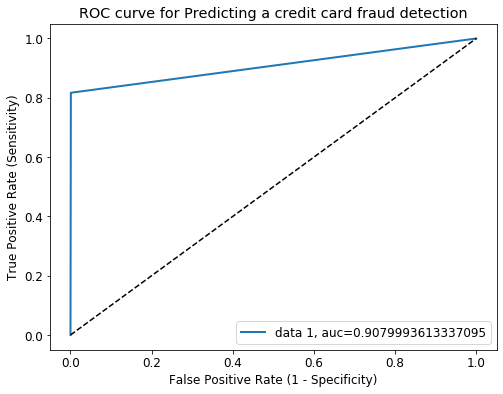

In [359]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_test)

auc = metrics.roc_auc_score(y_test, y_pred_test)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

### RANDOM FOREST WITH RANDOM OVERSAMPLING

### Running with Best Parameters

In [279]:
# Create the parameter grid based on the results of random search
cv_num = StratifiedKFold(3)
param_grid = {
    'max_depth': [10],
    'min_samples_leaf': [100],
    'min_samples_split': [200],
    'n_estimators': [300], 
    'max_features': [10]
}
# Create a based model
rf = RandomForestClassifier(random_state = 100)
# Instantiate the grid search model
grid_search_test_1 = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = cv_num, n_jobs = -1,verbose = 1, scoring = 'roc_auc')

# Fitting the train set
grid_search_test_1.fit(X_train_rf_random, y_train_rf_random)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  9.7min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=100), n_jobs=-1,
             param_grid={'max_depth': [10], 'max_features': [10],
                         'min_samples_leaf': [100], 'min_samples_split': [200],
                         'n_estimators': [300]},
             scoring='roc_auc', verbose=1)

In [371]:
# Predicting on Test 
y_predict_test_1 = grid_search_test_1.predict(X_test_sk)

In [372]:
confusion = confusion_matrix(y_test, y_predict_test_1)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


[[85155   146]
 [   25   117]]


In [373]:
print("AUC:{:2.2f}".format(metrics.roc_auc_score(y_test, y_predict_test_1)))

AUC:0.91


In [374]:
print(classification_report(y_test, y_predict_test_1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.44      0.82      0.58       142

    accuracy                           1.00     85443
   macro avg       0.72      0.91      0.79     85443
weighted avg       1.00      1.00      1.00     85443



AUC -  0.9141799602435188 



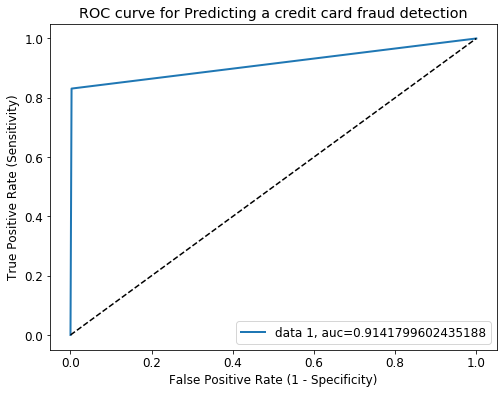

In [364]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_test_1)

auc = metrics.roc_auc_score(y_test, y_predict_test_1)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

### DECISION TREE WITH RANDOM OVERSAMPLING 

### Running With Best Parameters

In [291]:
# Create the parameter grid 
param_grid = {
    'max_depth': [10],
    'min_samples_leaf':[100],
    'min_samples_split': [50],
    'criterion': ["gini"]
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier(random_state = 100)

folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

grid_search_dt = GridSearchCV(estimator = dtree, param_grid = param_grid,
                           scoring = 'roc_auc',
                          cv = folds, verbose = 1)

# Fit the grid search to the data
grid_search_dt.fit(X_train_dt_random, y_train_dt_random)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   25.7s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'criterion': ['gini'], 'max_depth': [10],
                         'min_samples_leaf': [100], 'min_samples_split': [50]},
             scoring='roc_auc', verbose=1)

In [369]:
## Preicting on test set
y_predict_test_2 = grid_search_dt.predict(X_test_sk)

# making confusion matrix
confusion = confusion_matrix(y_test, y_predict_test_2)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[84614   687]
 [   28   114]]


In [370]:
# AUC-ROC score
print("AUC:{:2.2f}".format(metrics.roc_auc_score(y_test, y_predict_test_2)))

# Classification report 
print(classification_report(y_test, y_predict_test_2))

AUC:0.90
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85301
           1       0.14      0.80      0.24       142

    accuracy                           0.99     85443
   macro avg       0.57      0.90      0.62     85443
weighted avg       1.00      0.99      0.99     85443



AUC -  0.9082597482882075 



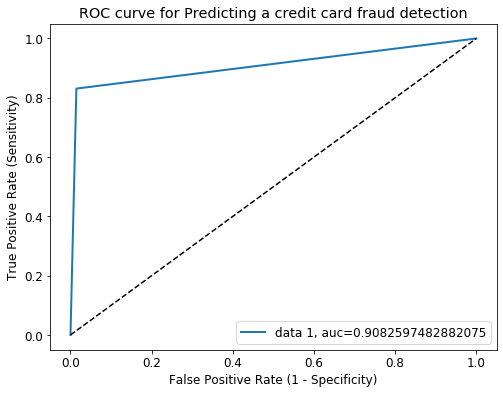

In [367]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_test_2)

auc = metrics.roc_auc_score(y_test, y_predict_test_2)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

# CONCLUSION

#### We investigated the data, checking for data unbalancing, visualizing the features and understanding the relationship between different features. We then investigated many predictive models using 4 algorithms. The data was split in 2 parts, a train set and test set.

#### We started with a XGBoost model with SMOTE. Then we used the model with the best training step, to predict target value from the test data; the AUC score obtained was 0.907.

#### We then experimented with RandomForrestClassifier with RANDOM OVERSAMPLING, for which we obtained an AUC scode of 0.914 when predicting the target for the test set.

#### As we can see from the AUC getting from two models Random Forest with Over Sampling is giving us more better AUC.